

## Data
We're going to do some customer segmentation for a **media company** (a digital magazine) to help them understand the needs of their customers better, and put them into useful groups of similar clusters. There are two datasets each of which is a random sample of `200` customers.

### Behavioral Data

[This dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_behavioral.csv) contains information about the media company customers' behavior on the site. The variables in the customer data include:

- `id`: customer id
- `gender`: self-disclosed gender identity, `male`, `female`, `nonbinary` or `other`
- `age`: age in years
- `current_income`: self-reported current annual income in thousands
- `time_spent_browsing`: average number of minutes spent browsing website per month
- `prop_ad_clicks`: proportion of website ads that they click on (between `0` and `1`)
- `longest_read_time`: longest time spent consecutively on website in minutes
- `length_of_subscription`: number of days subscribed to the magazine
- `monthly_visits`: average number of visits to the site per month



### Article Data

[This dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_topics.csv) contains information about the number of articles customers read in each topic in the past 3 months. The topics in the customer data include:

- `Stocks`
- `Productivity`
- `Fashion`
- `Celebrity`
- `Cryptocurrency`
- `Science`
- `Technology`
- `SelfHelp`
- `Fitness`
- `AI`



## 1. Behavioral Clustering
- Make ggplot scatterplots of pairs of your features to give you a little bit of information about the data, and to help you decide which algorithm to use (you don’t need to make scatterplots for all possible pairs of features, just make sure each feature appears at least once).
- Using `sklearn` `Pipeline`s, build and fit **one** clustering model (choose from **K-Means**, **Gaussian Mixture Models**, **DBSCAN**, and **Hierarchical Clustering**) using all the continuous/interval variables *except* `id`.
- Appropriately Z-score continuous/interval variables.
- Choose the number of clusters (if applicable) and in the **Methods** section of your report, explain how you chose. Also explain **why/how** you chose any relevant hyperparameters (such as linkage, distance metric, eps, min samples...).
- In the **Methods** section of your report, explain **in detail** both the *pros* and *cons* of the all the clustering models (e.g. what type of data do they work well for? Are there any possible downsides of using them?) and *provide a justification* for why you chose the clustering algorithm that you did.
- Using **plotnine/ggplot** and **PCA**, create a scatterplot of your clusters by plotting the first Principal Component (PC1) on the x-axis, and the second Principal Component (PC2) on the y-axis. Color the points by their cluster. Include this plot in your **Results** Section.
- (DO NOT cluster on the PCs, you're only using the PCs to visualize the clusters you fit on the original features)
- Create at least one *other* summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: `groupby()`). In the **Results** section, discuss in detail:
    - what kind of customers are in each cluster
    - how the clusters "performed" (e.g. are they good clusters? How can you tell?)
    - how that information might help the company



## 2. Article Clustering
- Using an `sklearn` `Pipeline`, build and fit a **Hierarchical Clustering** model using all the variables *except* `id`. Use cosine similarity as your distance metric (also called `affinity`) and `average` linkage.
- Do **not** z-score, as these are counts.
- Create a dendrogram and use it to determine the number of clusters you'll use. In the **Methods** section of your report, explain **what number** of cluster you decided to use and **why**.
- In the **Results** section, discuss the performance of the model based on the dendrogram.
- Create at least one other summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: `groupby()`). In the **Results** section, discuss in detail what kind of customers are in each cluster, and how that information might help the company.


# 1. Behaviorial Clustering Work:

## Finding which clustering model to use based on the data:

In [49]:
# importing relevant libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

%matplotlib inline

In [50]:
behavior = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_behavioral.csv")
behavior.head()

,age,current_income,time_spent_browsing,length_of_subscription,monthly_visits,longest_read_time,gender,prop_ads_clicked,id
0,57,74.94,680.185910,344.260552,33.612656,252.092201,man,0.177864,90
1,47,67.01,554.768760,330.549067,28.924096,119.694118,woman,0.138873,1
2,49,66.71,618.436797,247.549601,28.274578,321.450862,woman,0.200859,125
3,47,79.20,560.599752,269.378967,30.471076,179.349038,woman,0.191236,164
4,50,68.39,628.441198,260.282353,32.486453,213.114138,man,0.089133,75


In [51]:
# examining the dimensions of our dataframe
behavior.shape

(200, 9)

This dataset is not a large dataset since it is a sample of 200 customers, we can opt to use either K-Means, GMM, DBSCAN, or HAC.

In [52]:
num_cols = behavior.select_dtypes(include = [int, float]).columns.tolist()
num_cols.remove("id")

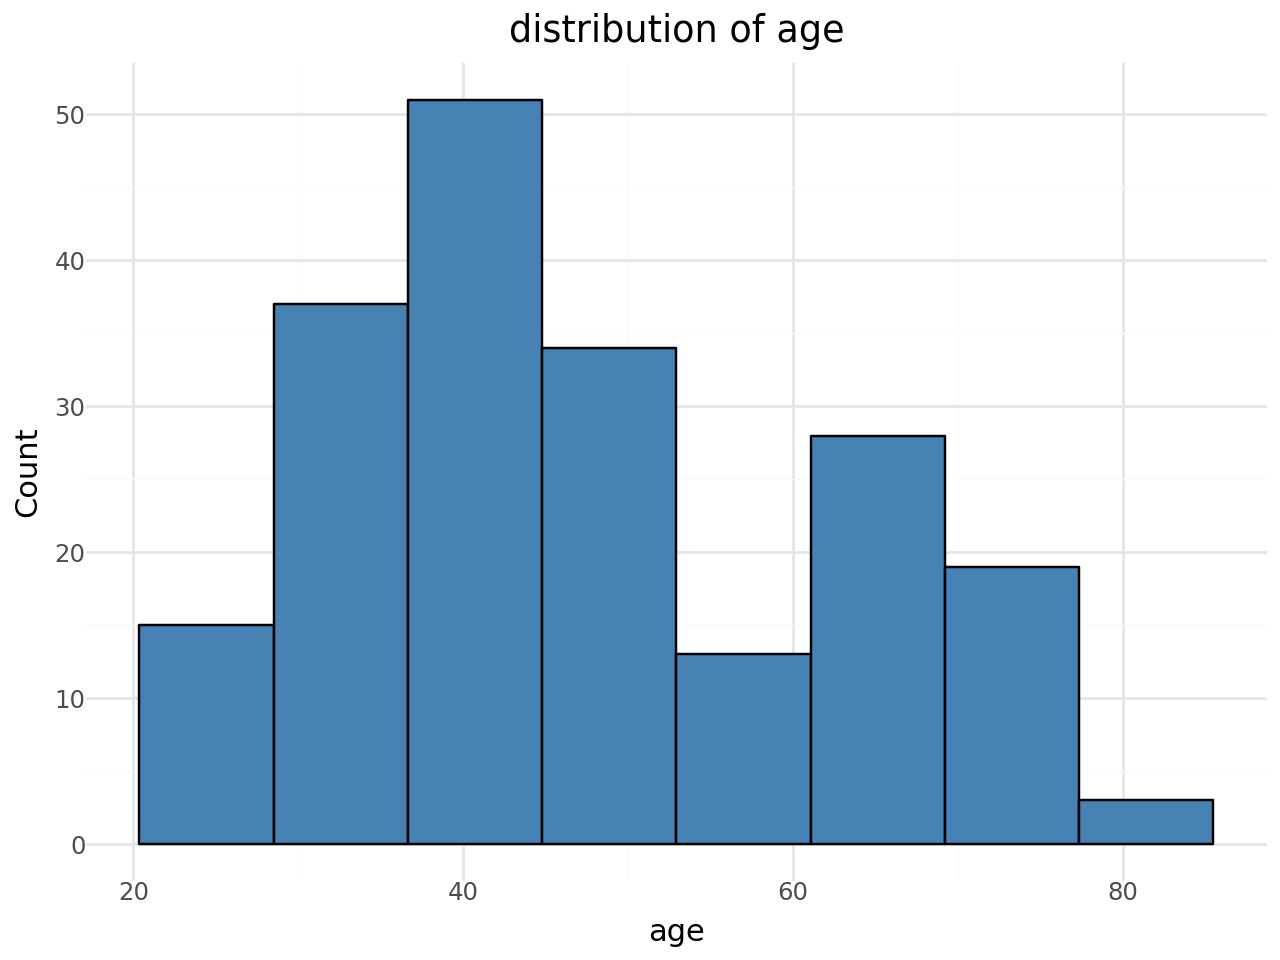

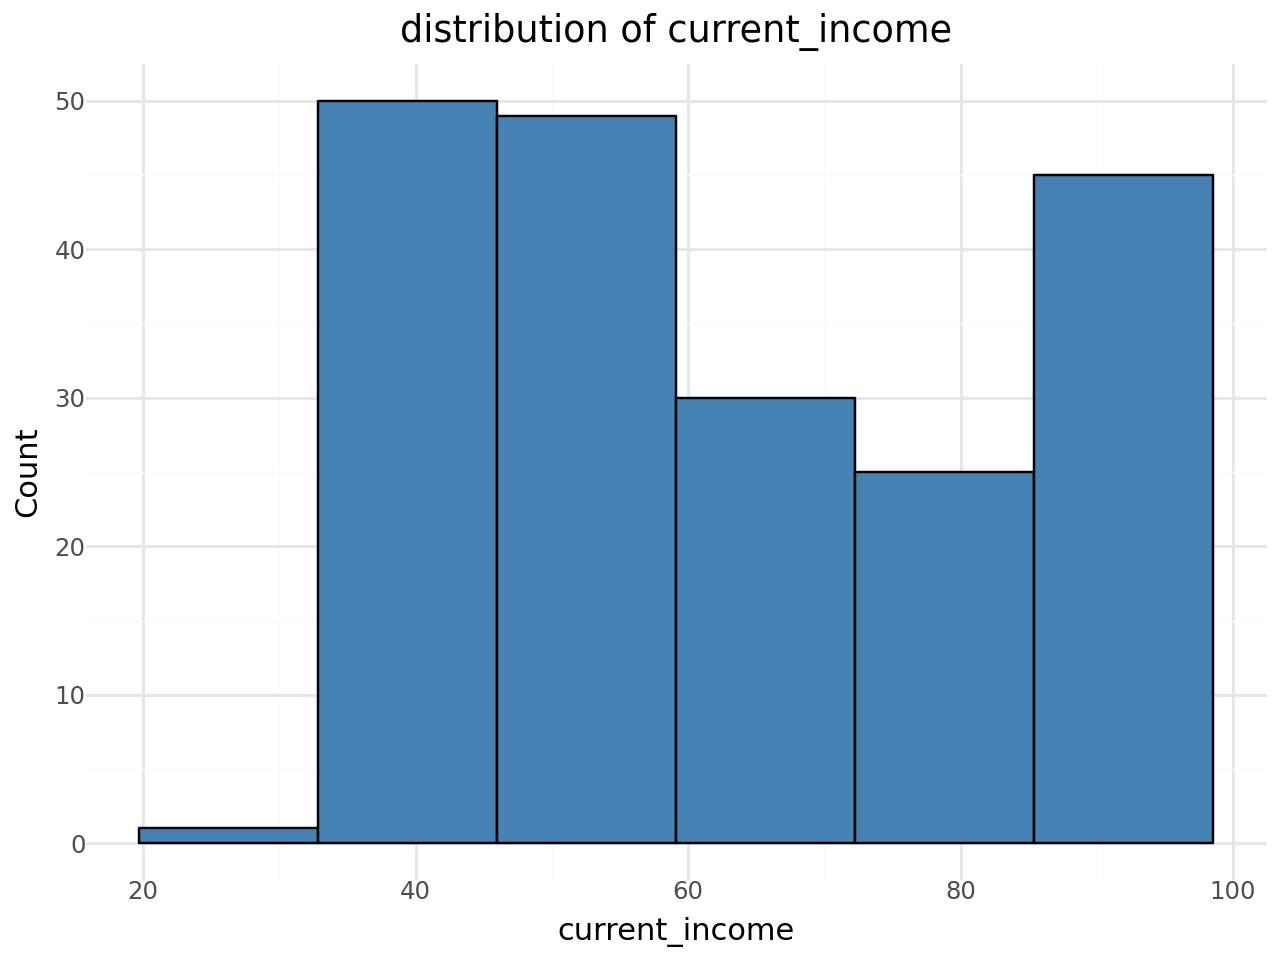

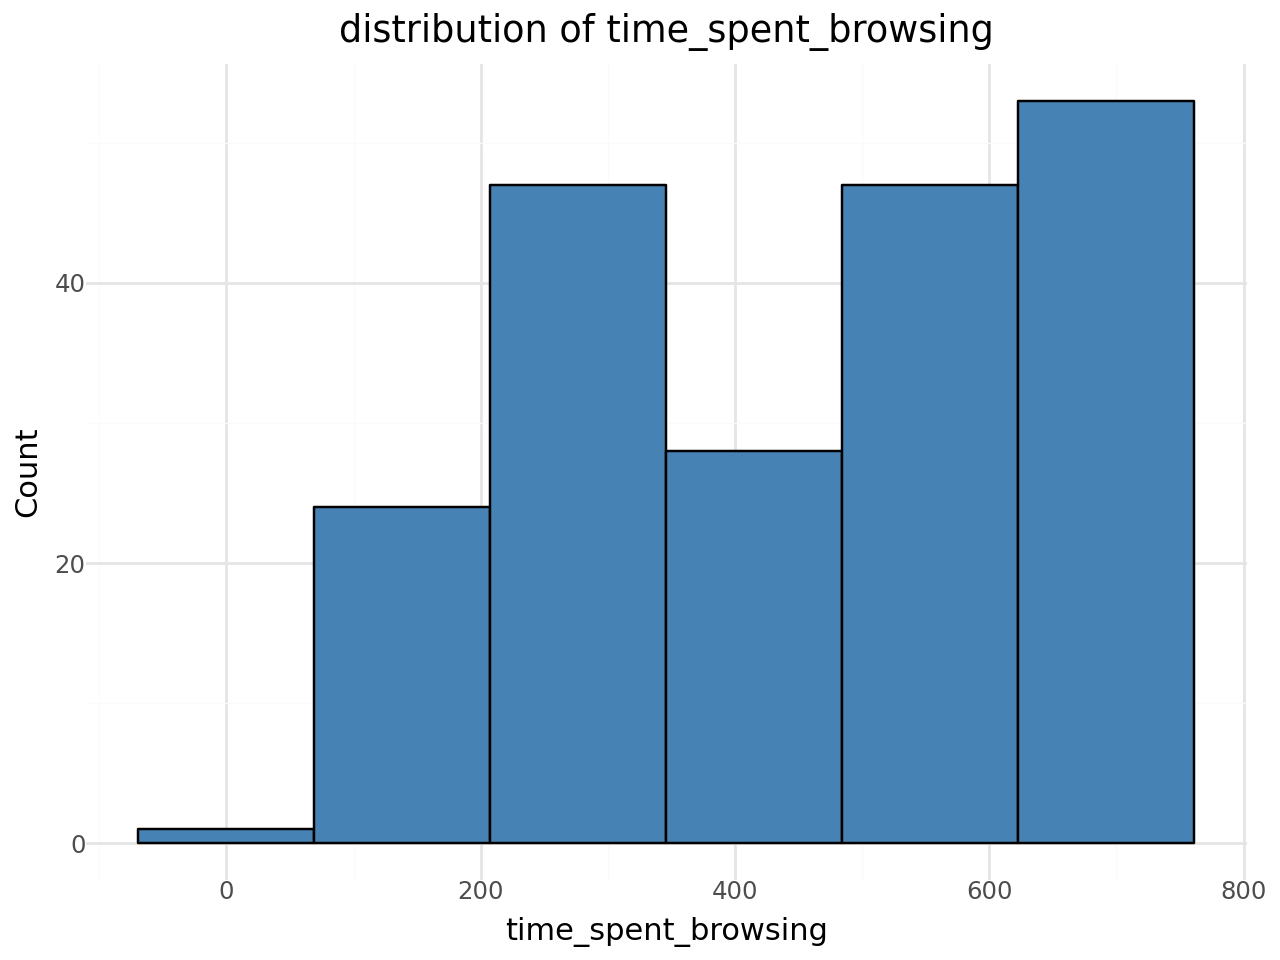

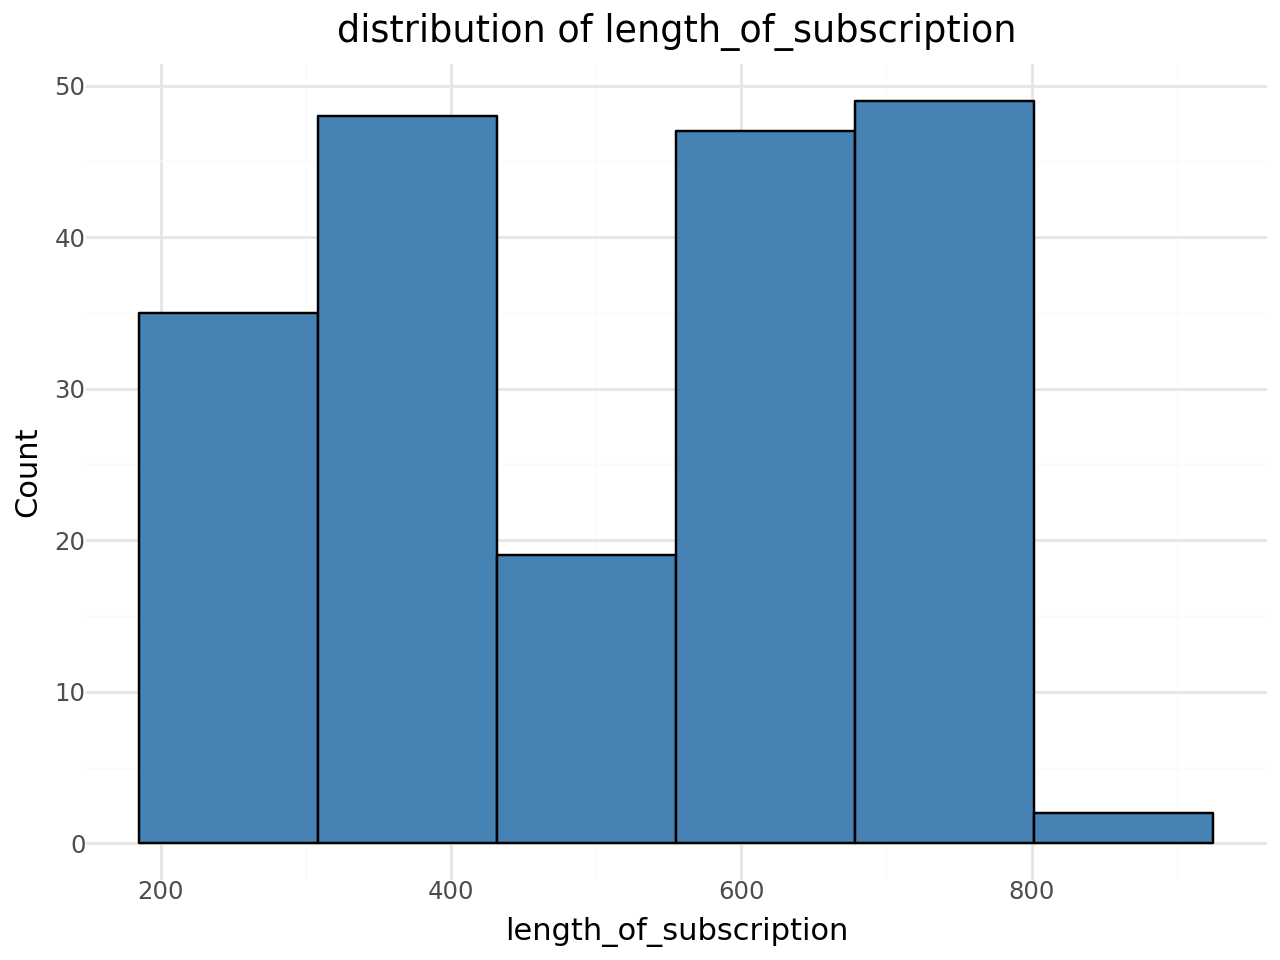

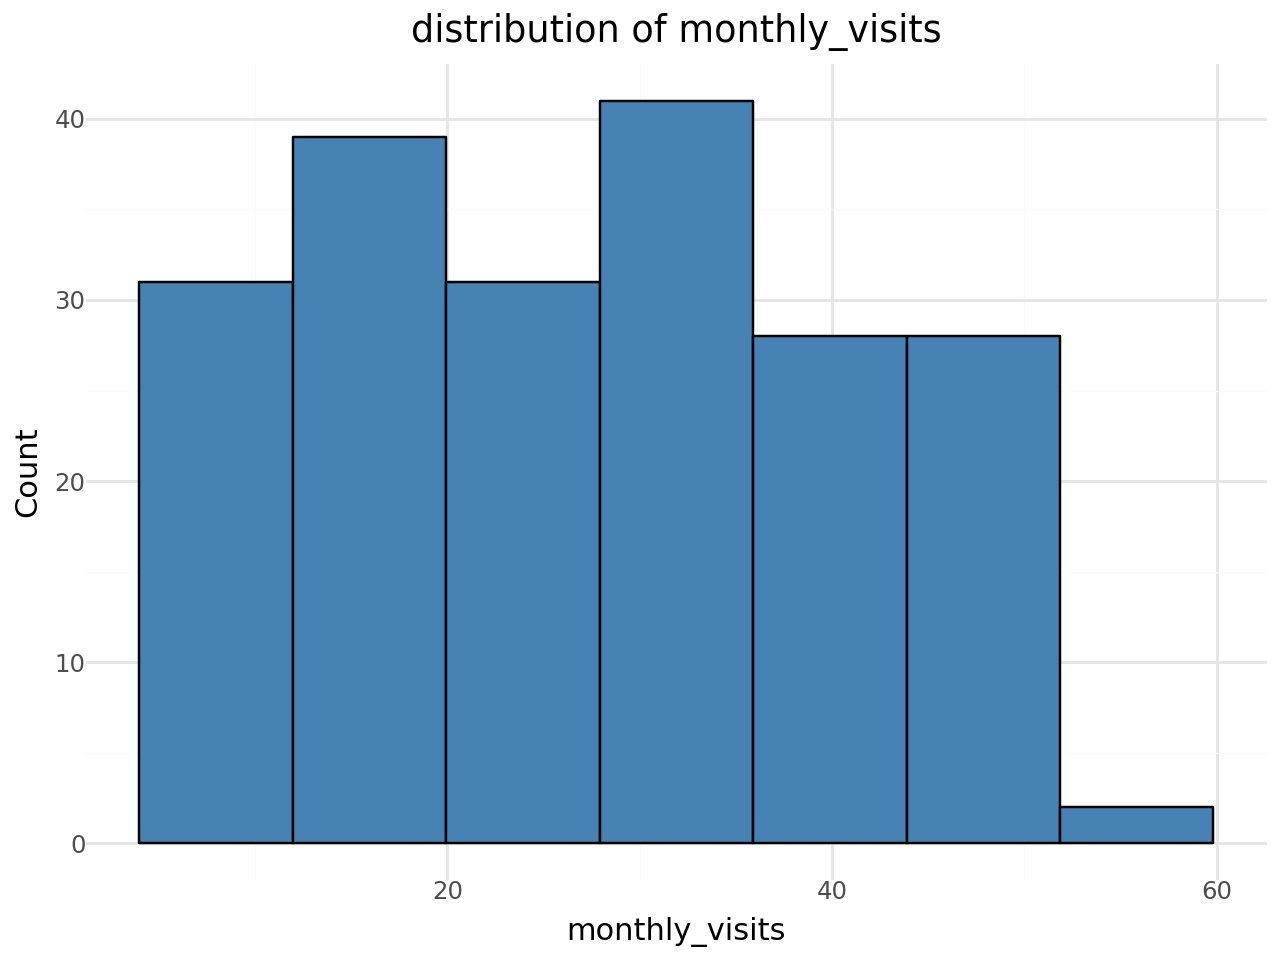

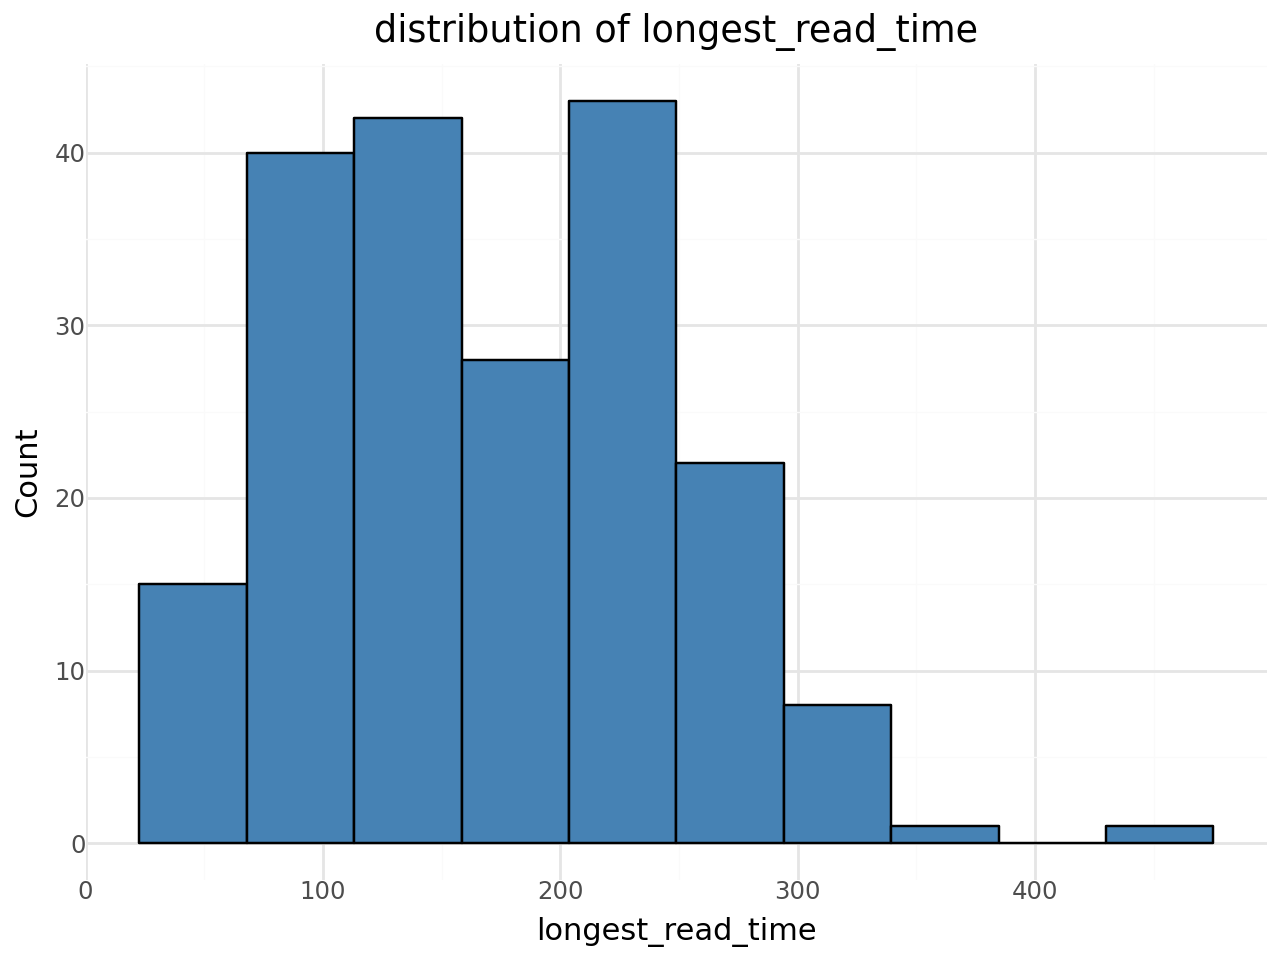

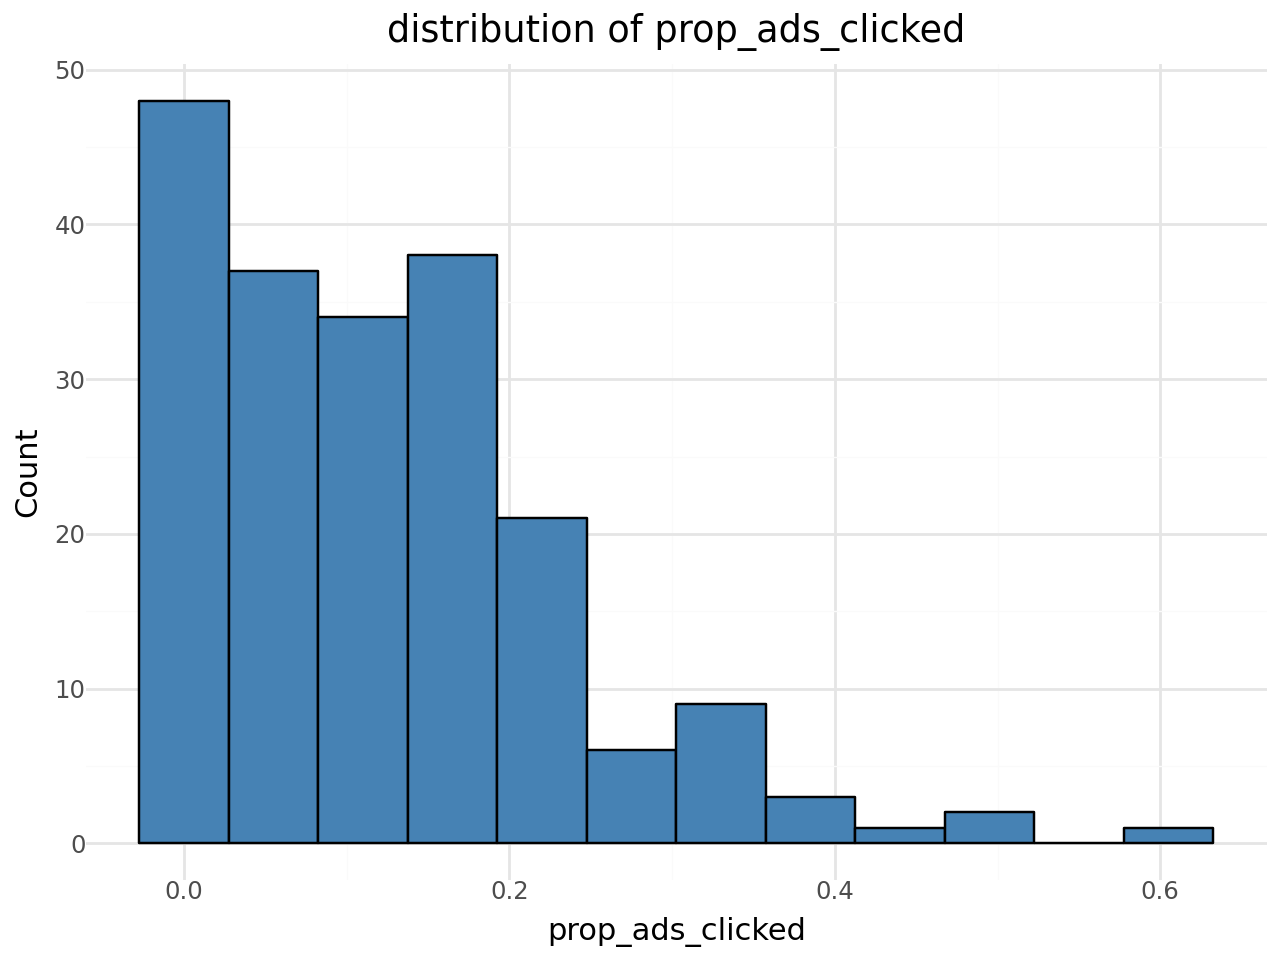

In [53]:
# to observe distributions of our features we will generate histograms of every feature

for col in num_cols:
  p = (ggplot(behavior, aes(x = col)) +
   geom_histogram(fill = "steelblue", color = "black") +
   labs(title = f"distribution of {col}",
        x = col,
        y = "Count") +
    theme_minimal())
  display(p)

- Age Histogram: Normally distributed

- Current Income Histogram: Very few individuals with ~20-35k salary

- Time Spent Browsing Histogram: Left Skewed

- Length of Subscription Histogram: Very few individuals with 800+ days of subscription to a magazine

- Monthly Visits Histogram: Very few individuals with ~52-60 average number of visits to the site per month

- Longest Read Time Histogram: Shows outliers of individuals with longest read time of ~450-550 spent consecutively on website in minutes

- Distribution of Proportion of Ads Clicked: Right skewed with outliers around ~0.57-0.62 proportion of ads clicked


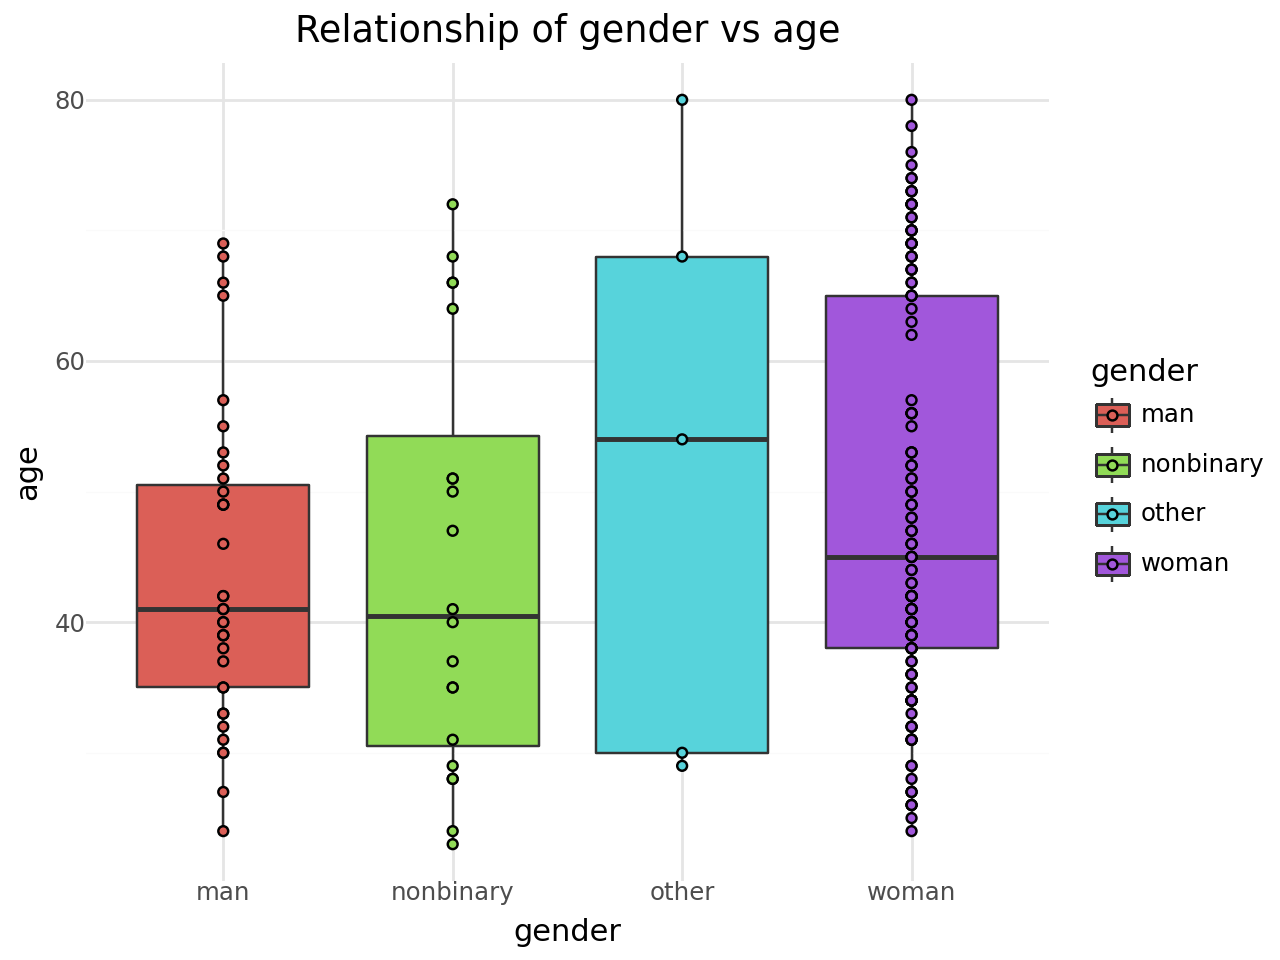

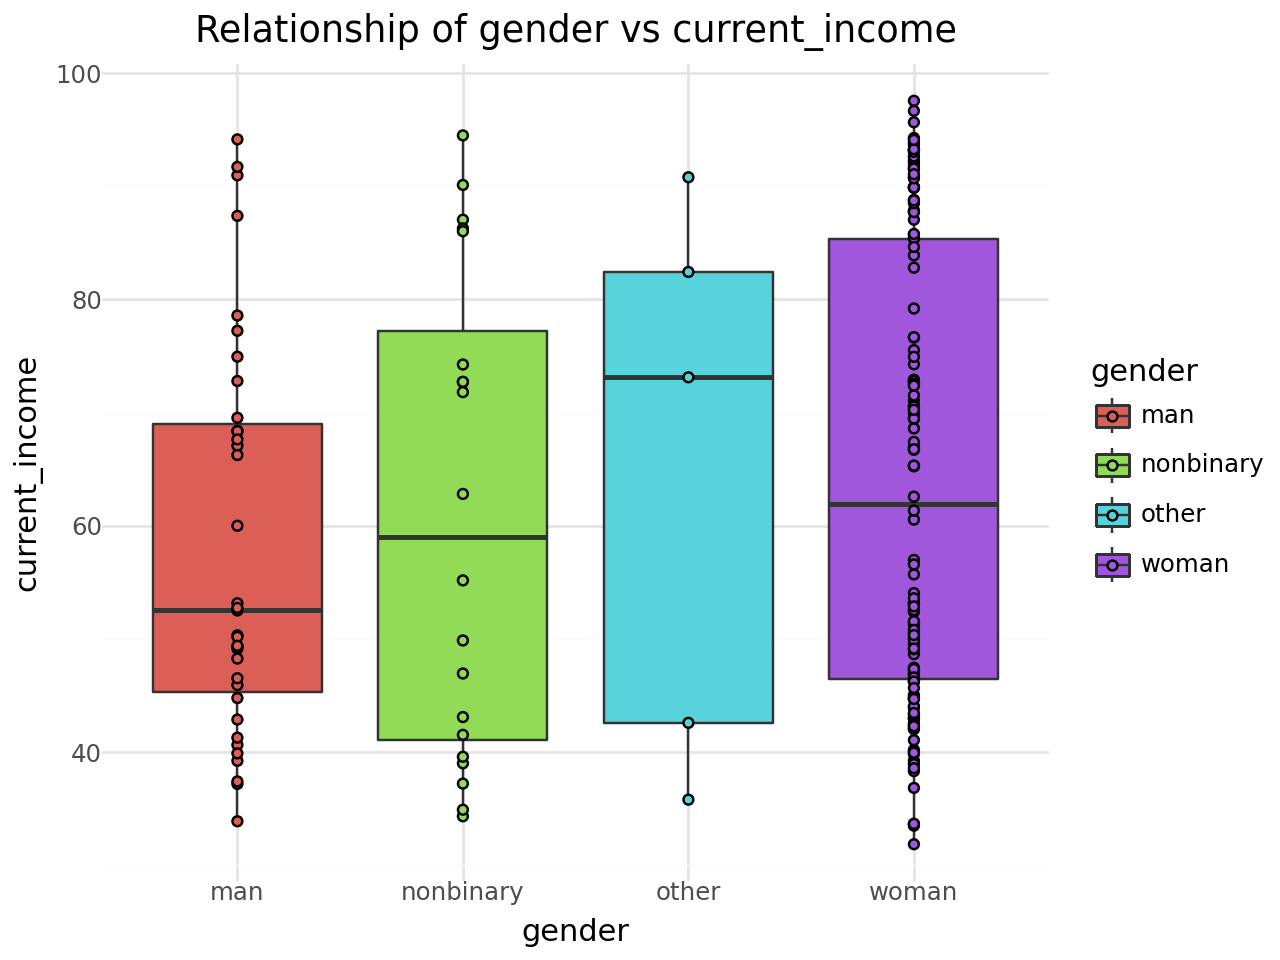

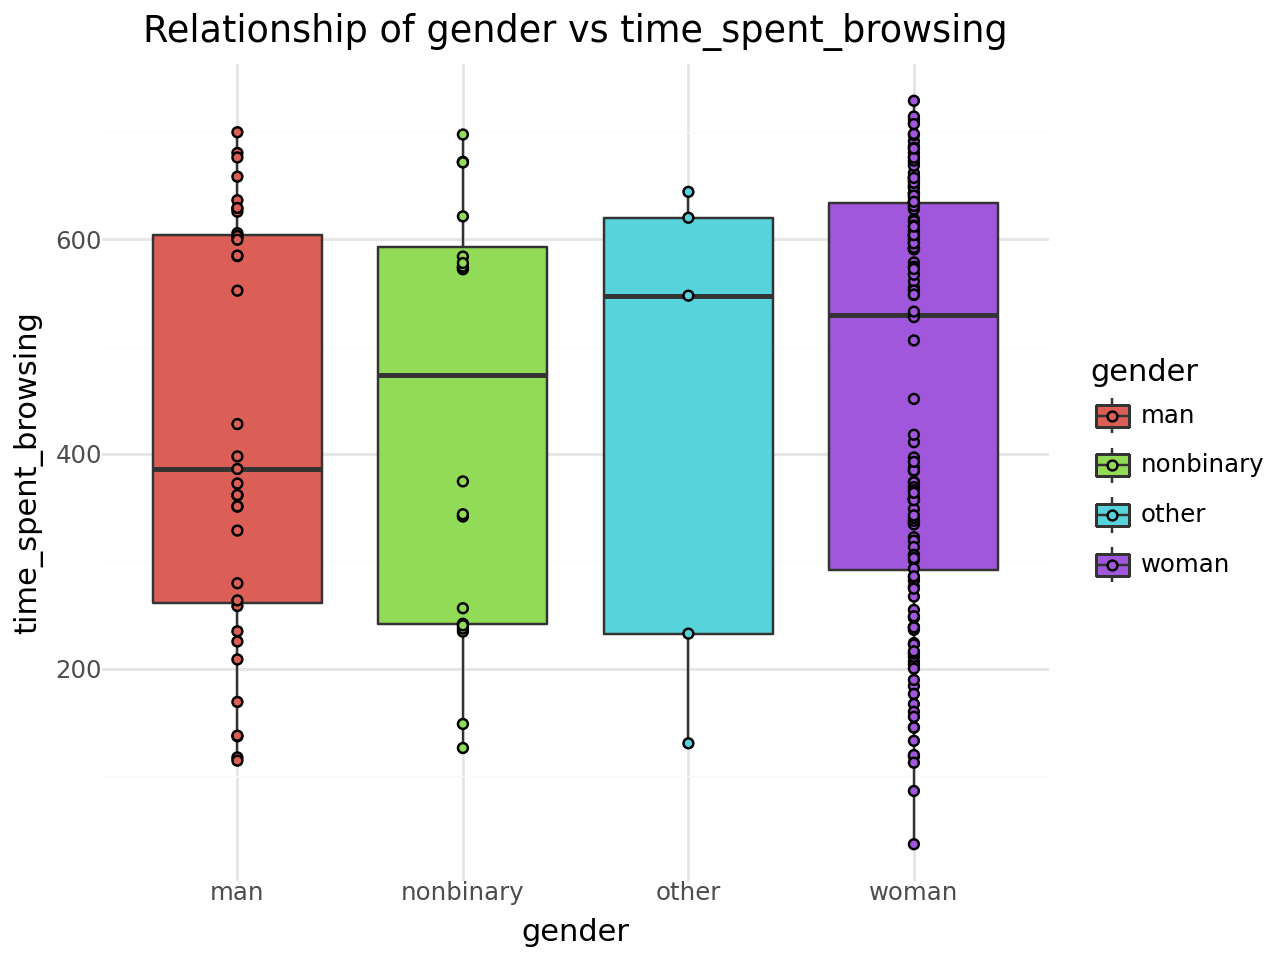

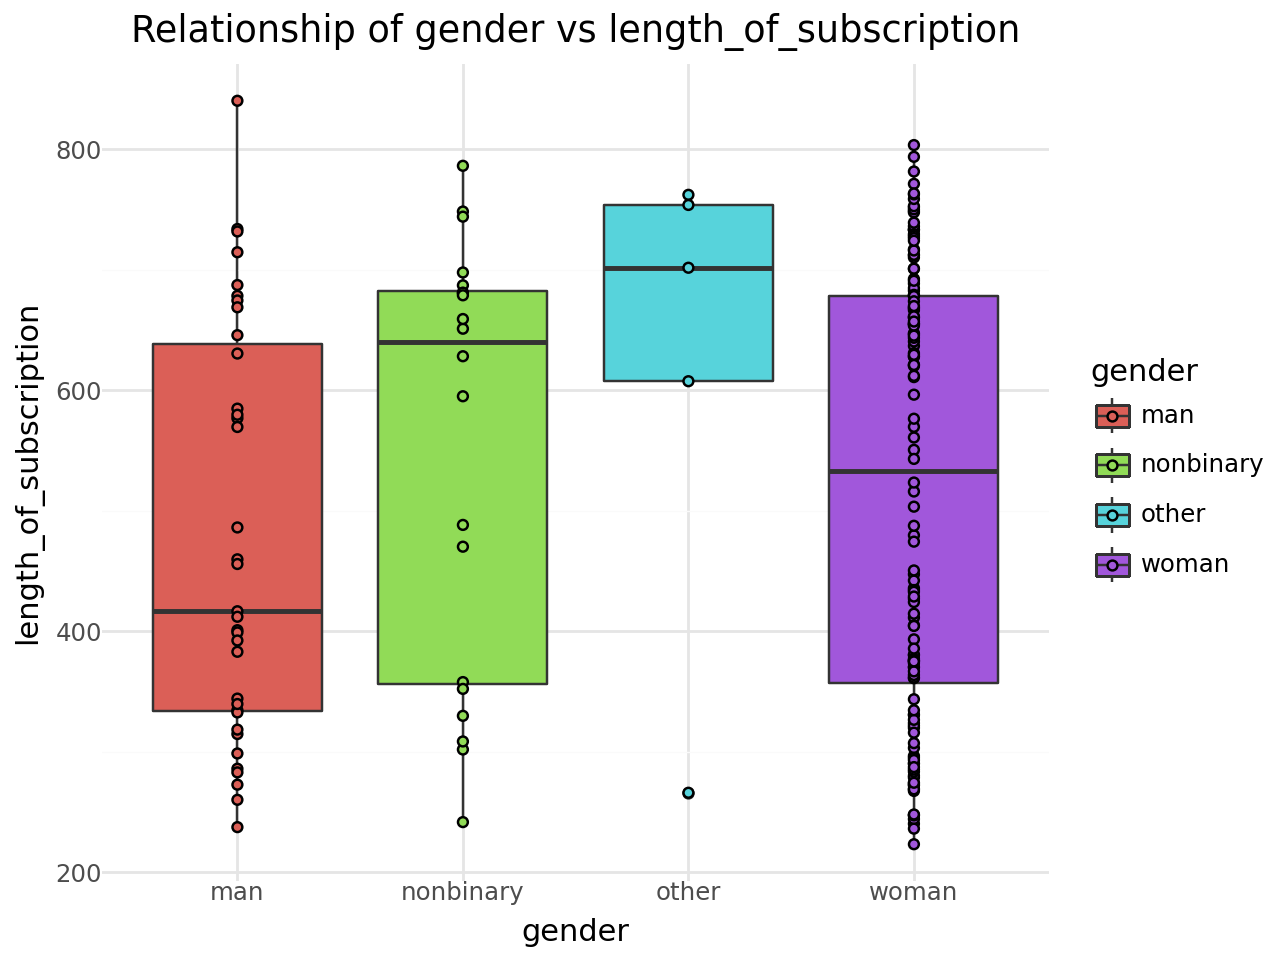

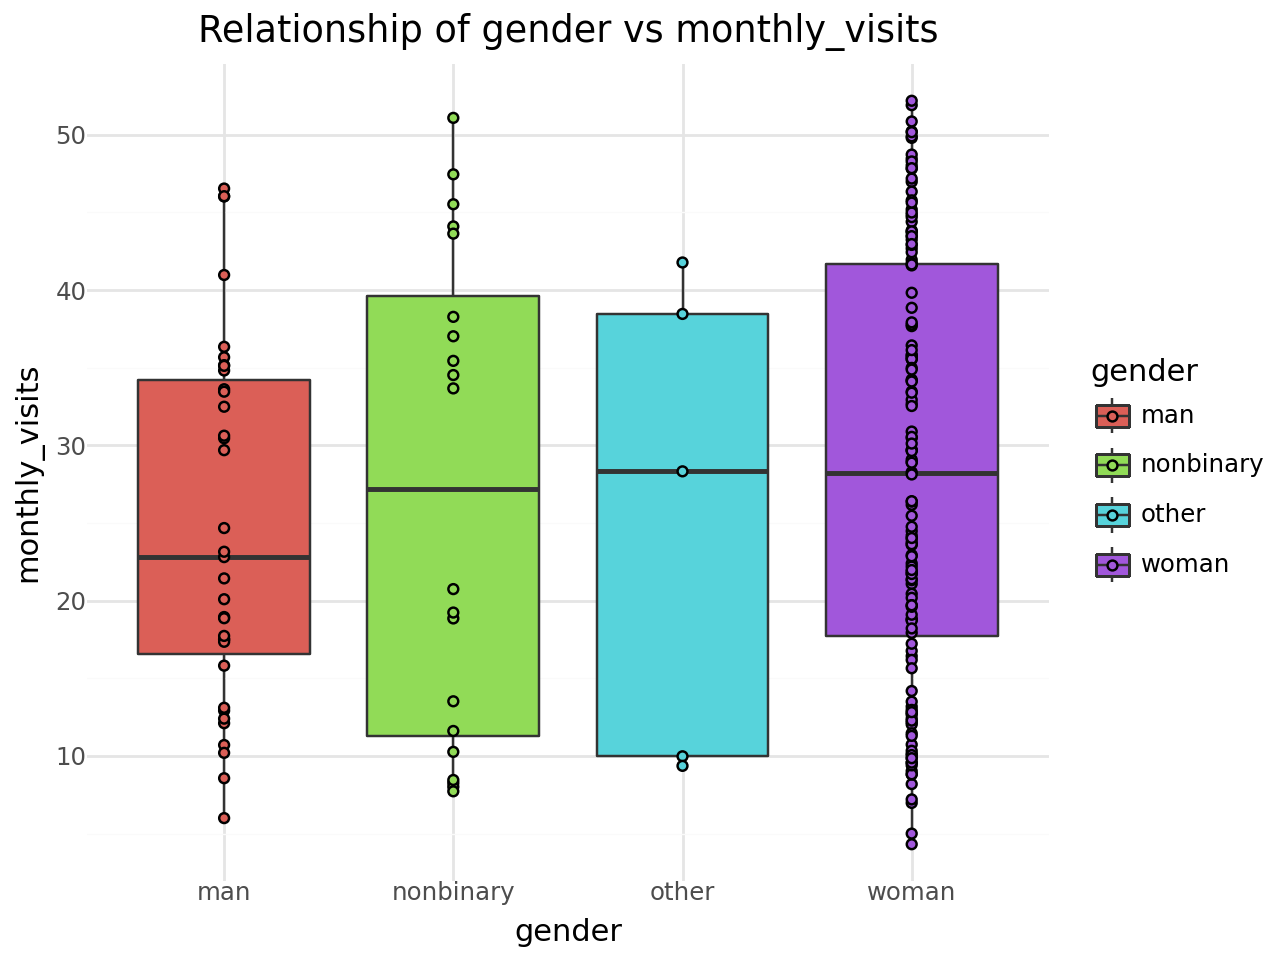

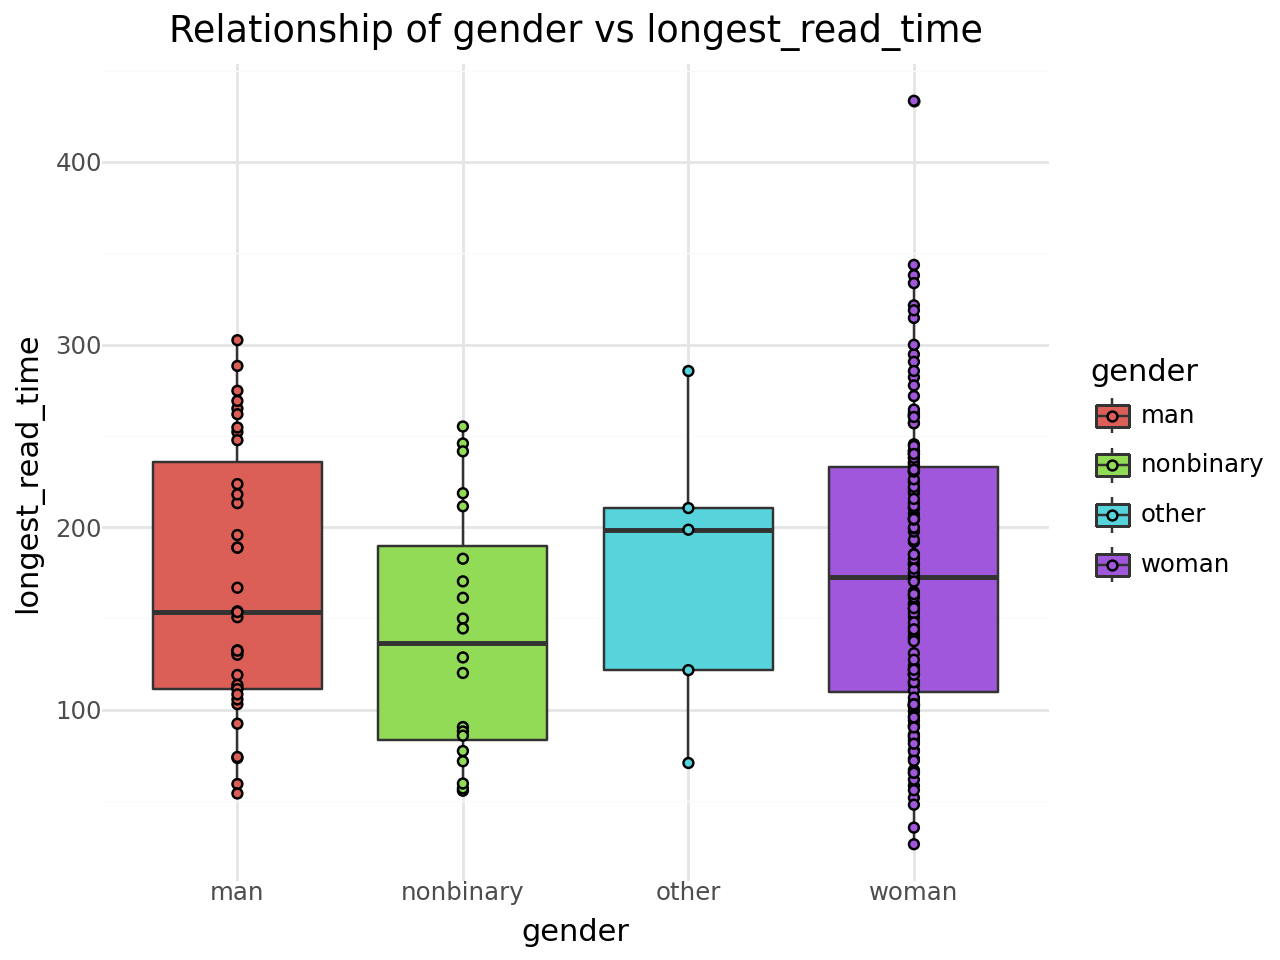

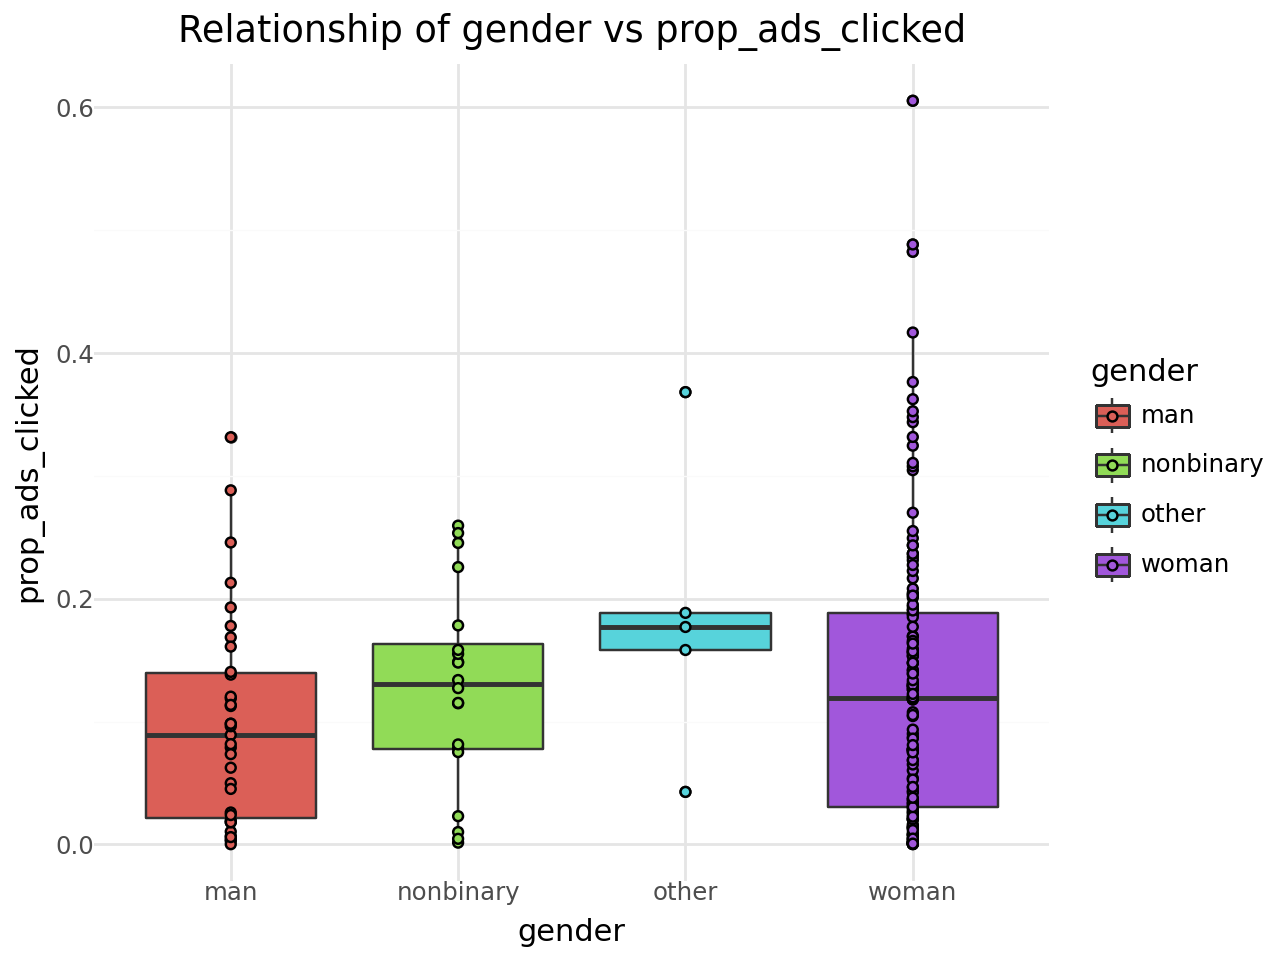

In [54]:
# observe the relationship between gender vs all other features:

for col in num_cols:
  p = (ggplot(behavior, aes(x = "gender", y = col, fill = "gender")) +
       geom_boxplot() +
       labs(title = f"Relationship of gender vs {col}",
            x = "gender",
            y= col) +
       theme_minimal() +
       geom_point())
  display(p)

- From the boxplots above, we see that the features 'prop_ads_clicked', 'longest_read_time', and 'length_of_subscription' have outliers.

In [55]:
# examine skewness of each numeric feature:
behavior[num_cols].skew()

,0
age,0.453629
current_income,0.272873
time_spent_browsing,-0.252421
length_of_subscription,-0.067102
monthly_visits,0.107218
longest_read_time,0.354169
prop_ads_clicked,1.221454


* Note:
 - greater than 0 → right-skewed
 - less than 0 → left-skewed
 - around 0 -> roughly symmetric

> Exact skewness shows that time_spent_browsing, longest_read_time, and prop_ads_clicked are moderately skewed.
> Since log transformations are only appropriate with positively skewed data, we can log transform 'prop_ads_clicked'
> Left skewed variables can be transformed by reflecting them first so that they are right skewed, then log transformed

- Based on these distributions:

  - K-Means might not work best since this model is sensitive to skewness, outliers, and different scales -> we can standardize/normalize and transform the skewed variables (log transform) to use K-Means

  - GMM assumes that our data follows a mixture of gaussians that follow the shape of elliptical clusters BUT not all distributions are gaussian since some are left/right skewed/heavy tailed -> we can implement preprocessing that handles skewness such as log transform our skewed variables to use GMM

  - DBSCAN might struggle here since it is a density based model and we only have a sample of 200 data

  - Hierarchial Agglomerative Clustering doesn't make any assumptions on shape but is sensitive to the outliers and scaling -> we can standardize/normalize our features and transform our skewed varaibles to use HAC

> Since we have a small sample, computational costs is not an issue and HAC has the most flexibility with interpretable clustering.

In [56]:
# Use HAC as our clustering model
# Drop the id column + Handle missingness:

behavior.drop("id", axis = 1, inplace = True)
behavior.isna().sum()

,0
age,0
current_income,0
time_spent_browsing,0
length_of_subscription,0
monthly_visits,0
longest_read_time,0
gender,0
prop_ads_clicked,0


In [57]:
# one-hot-encode object column(s):
obj_cols = behavior.select_dtypes(include = [object]).columns.tolist()
obj_cols

['gender']

In [58]:
behavior = pd.get_dummies(behavior, columns = ['gender'], drop_first = True)
behavior

,age,current_income,time_spent_browsing,length_of_subscription,monthly_visits,longest_read_time,prop_ads_clicked,gender_nonbinary,gender_other,gender_woman
0,57,74.94,680.185910,344.260552,33.612656,252.092201,0.177864,False,False,False
1,47,67.01,554.768760,330.549067,28.924096,119.694118,0.138873,False,False,True
2,49,66.71,618.436797,247.549601,28.274578,321.450862,0.200859,False,False,True
3,47,79.20,560.599752,269.378967,30.471076,179.349038,0.191236,False,False,True
4,50,68.39,628.441198,260.282353,32.486453,213.114138,0.089133,False,False,False
...,...,...,...,...,...,...,...,...,...,...
195,67,91.07,572.157802,661.448335,44.992557,299.841697,0.376440,False,False,True
196,56,85.44,548.440006,657.130185,42.960546,170.210615,0.080888,False,False,True
197,65,94.10,611.601084,762.648828,45.773857,215.438307,0.310586,False,False,True
198,73,85.79,684.254704,763.412996,41.649209,260.319145,0.605402,False,False,True


In [59]:
# log transform our skewed features:
behavior['prop_ads_clicked_log'] = np.log1p(behavior['prop_ads_clicked'])

# left-skewed features: reflect and then apply log transform
behavior['time_spent_browsing_log'] = np.log1p(behavior['time_spent_browsing'].max() - behavior['time_spent_browsing'])
behavior['longest_read_time_log'] = np.log1p(behavior['longest_read_time'].max() - behavior['longest_read_time'])

# check skewness after transformation
behavior[['prop_ads_clicked_log', 'time_spent_browsing_log', 'longest_read_time_log']].skew()


,0
prop_ads_clicked_log,0.914471
time_spent_browsing_log,-1.209805
longest_read_time_log,-6.933767


> prop_ads_clicked_log went from 0.914 to ~0.694 — less right skewed time_spent_browsing_log went from -1.043 to ~0.507 — now moderately right skewed instead of left skewed. longest_read_time_log went from -0.608 to ~0.103 — almost symmetric.

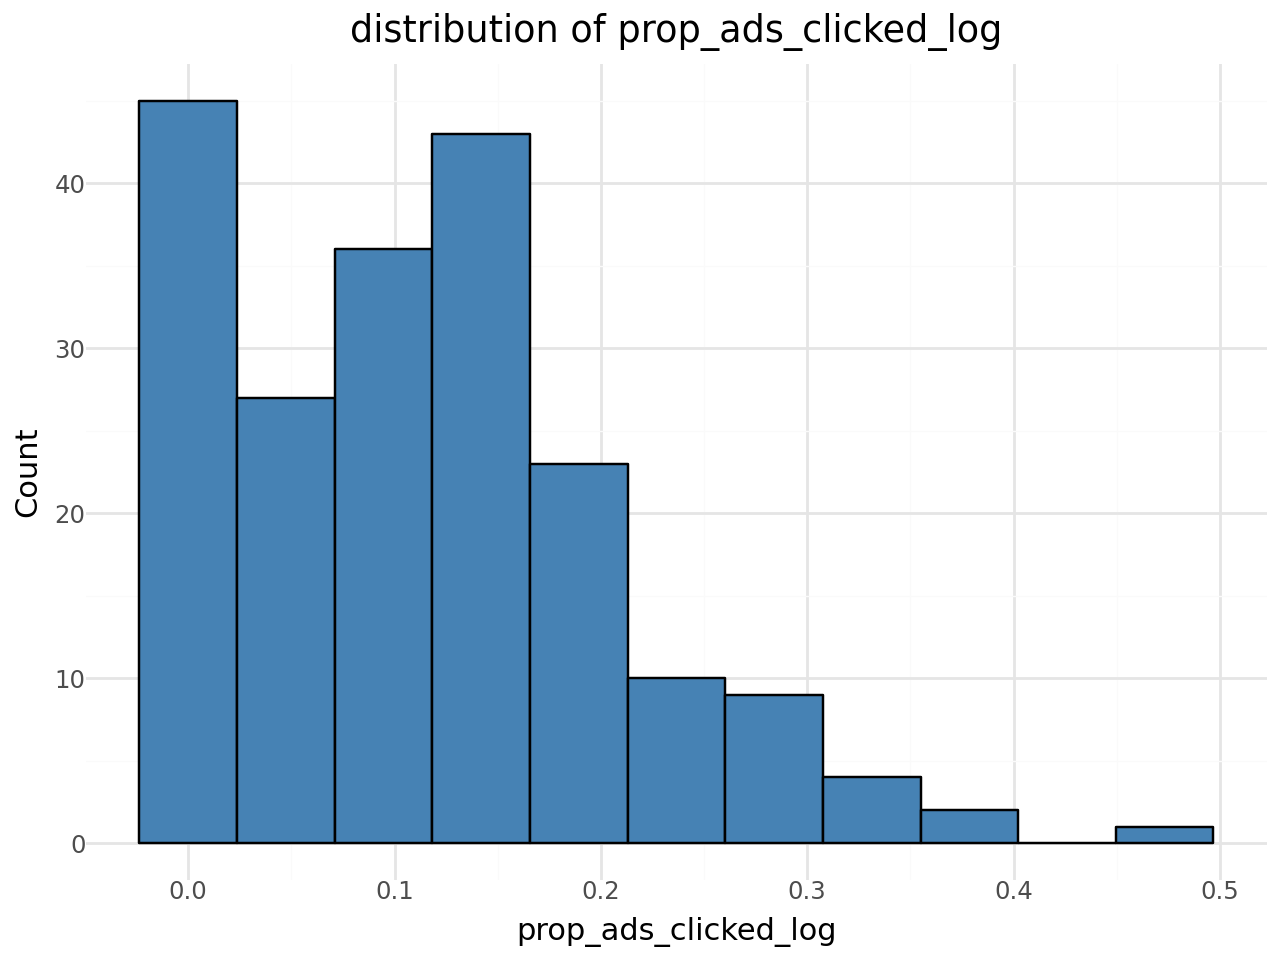

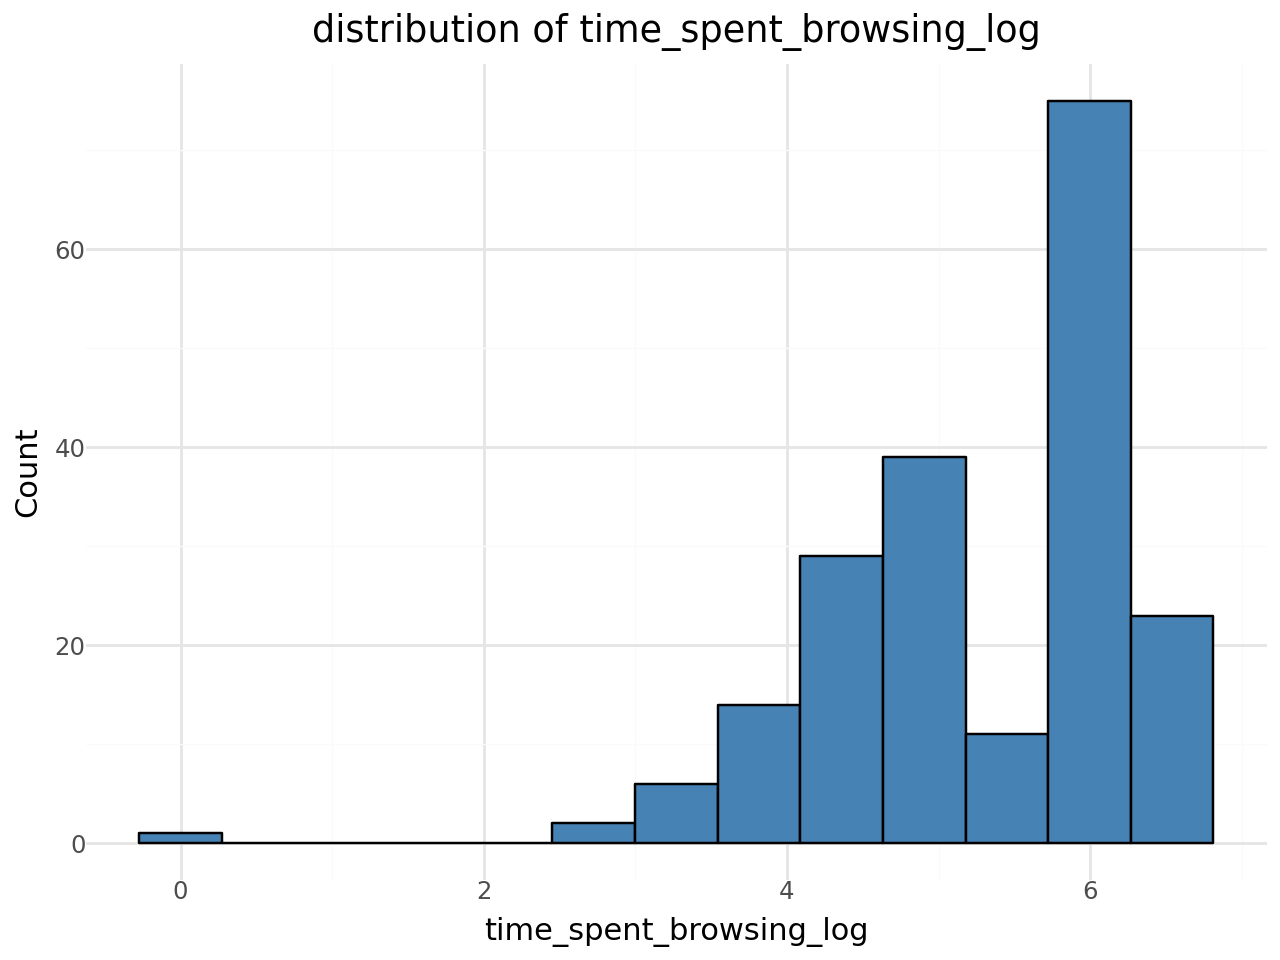

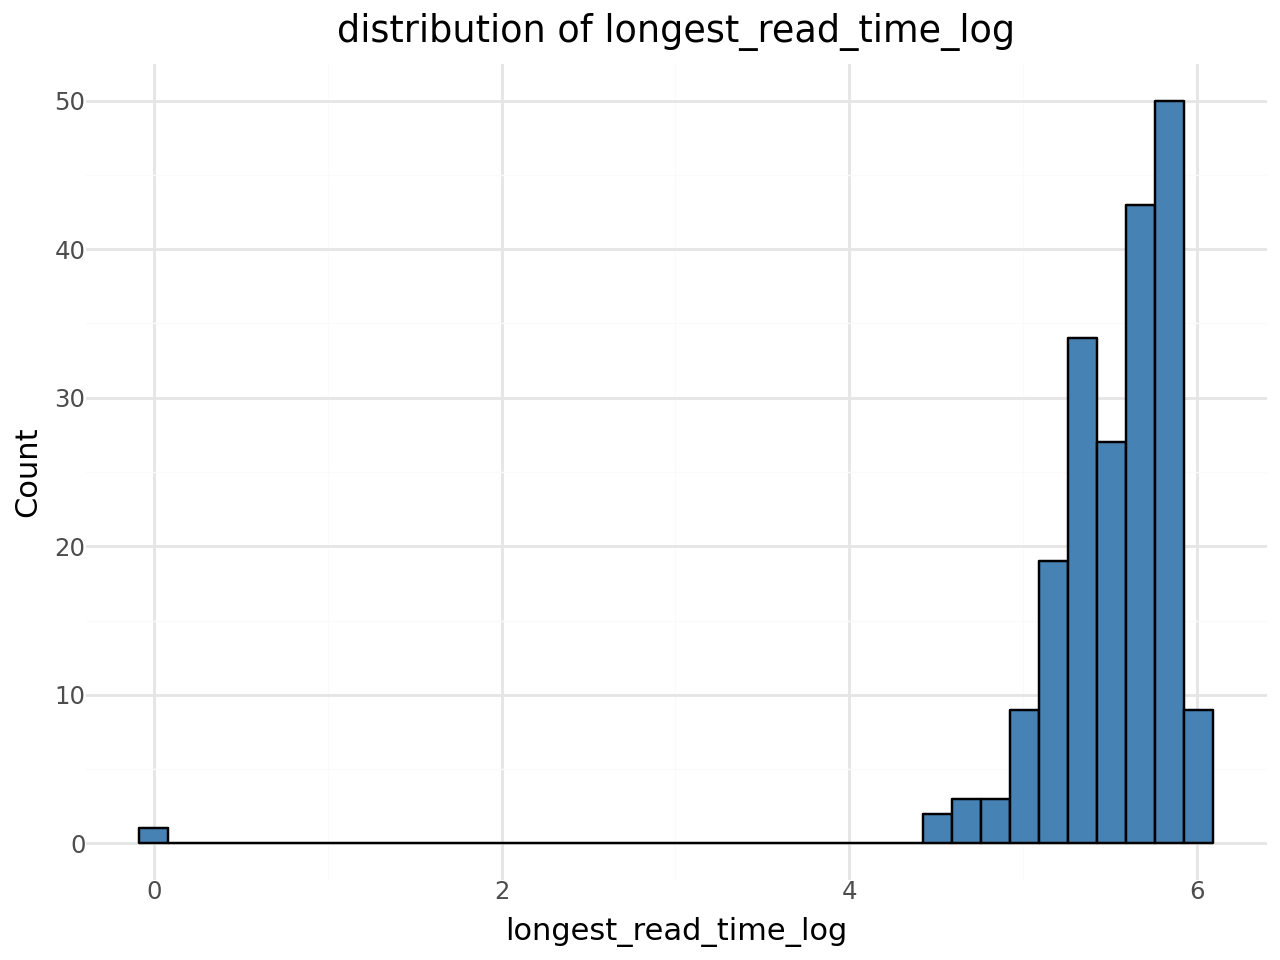

In [60]:
transformed_features = ['prop_ads_clicked_log', 'time_spent_browsing_log', 'longest_read_time_log']
# recheck histograms:
for col in transformed_features:
  p = (ggplot(behavior, aes(x = col)) +
   geom_histogram(fill = "steelblue", color = "black") +
   labs(title = f"distribution of {col}",
        x = col,
        y = "Count") +
    theme_minimal())
  display(p)

In [61]:
# cleaning our dataframe to only keep the transformed features
behavior.drop(columns = ['prop_ads_clicked', 'time_spent_browsing', 'longest_read_time'], inplace = True)
behavior.head()

,age,current_income,length_of_subscription,monthly_visits,gender_nonbinary,gender_other,gender_woman,prop_ads_clicked_log,time_spent_browsing_log,longest_read_time_log
0,57,74.94,344.260552,33.612656,False,False,False,0.163703,3.902920,5.206365
1,47,67.01,330.549067,28.924096,False,False,True,0.130039,5.164581,5.752026
2,49,66.71,247.549601,28.274578,False,False,True,0.183037,4.712193,4.728016
3,47,79.20,269.378967,30.471076,False,False,True,0.174991,5.130686,5.541941
4,50,68.39,260.282353,32.486453,False,False,False,0.085382,4.618004,5.400006


In [62]:
# create interaction features

# users with higher income might behave differently in terms of ad clicks/browsing:
behavior['income_times_ads'] = behavior['current_income'] * behavior['prop_ads_clicked_log']
behavior['income_times_visits'] = behavior['current_income'] * behavior['monthly_visits']
behavior['income_times_time_spent'] = behavior['current_income'] * behavior['time_spent_browsing_log']

# capture heavy users by combining average monthly visits + time spent:
behavior['visits_times_time'] = behavior['monthly_visits'] * behavior['time_spent_browsing_log']
behavior['visits_times_read'] = behavior['monthly_visits'] * behavior['longest_read_time_log']

# older users might click differently or spend different amounts of time:
behavior['age_times_ads'] = behavior['age'] * behavior['prop_ads_clicked_log']
behavior['age_times_time_spent'] = behavior['age'] * behavior['time_spent_browsing_log']
behavior['age_times_read'] = behavior['age'] * behavior['longest_read_time_log']

# does engagement patterns change with gender?
behavior['woman_times_ads'] = behavior['gender_woman'] * behavior['prop_ads_clicked_log']
behavior['woman_times_visits'] = behavior['gender_woman'] * behavior['monthly_visits']
behavior['nonbinary_times_ads'] = behavior['gender_nonbinary'] * behavior['prop_ads_clicked_log']

In [63]:
# scaling/z-scoring our data:
scaler = StandardScaler()

behavior_scaled = scaler.fit_transform(behavior)

## training an HAC model using standard scaled data:

In [64]:
# train the hac model:

best_score = -1
best_params = {}

n_clusters_list = list(range(2,10,1))
linkage_list = ['ward', 'complete', 'average', 'single']

for n in n_clusters_list:
    for link in linkage_list:
        if link == 'ward':
            model = AgglomerativeClustering(n_clusters=n, linkage=link)
        else:
            model = AgglomerativeClustering(n_clusters=n, linkage=link, metric='euclidean')

        labels = model.fit_predict(behavior_scaled)
        score = silhouette_score(behavior_scaled, labels)

        if score > best_score:
            best_score = score
            best_params = {'n_clusters': n, 'linkage': link}

print("Best params:", best_params)
print("Best silhouette score:", best_score)


Best params: {'n_clusters': 2, 'linkage': 'average'}
Best silhouette score: 0.5634821889207765


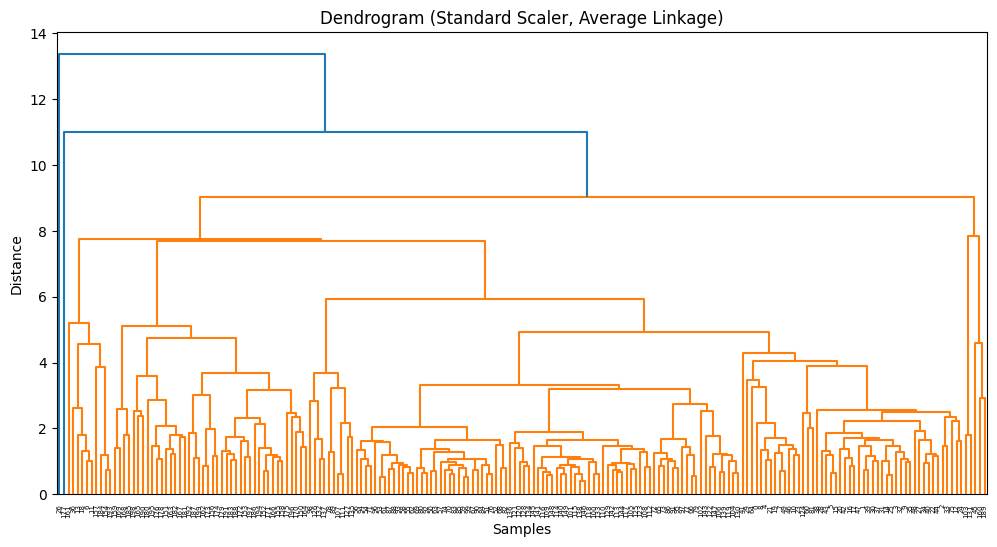

In [65]:
# Compute the linkage matrix using the best linkage method
linkage_matrix = sch.linkage(behavior_scaled, method=best_params['linkage'])

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.title(f"Dendrogram (Standard Scaler, {best_params['linkage'].capitalize()} Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

> The dendrogram here shows poor distinguising performance because clusters who are are grouped together have high dissimiliarity that is indicated by the "tallness" of the bars at the bottom. It only distinguishes two clusters (blue and orange) however the orange cluster contains almost all of our data indicating poor distinguishing performance.

## training an HAC model on robust scaled data:

In [66]:
from sklearn.preprocessing import RobustScaler

# apply RobustScaler
robust_scaler = RobustScaler()
behavior_scaled_robust = robust_scaler.fit_transform(behavior)

# perform hyperparameter search using robust scaled data
best_score = -1
best_params = {}

n_clusters_list = list(range(2, 10))  # 2 to 9 clusters
linkage_list = ['ward', 'complete', 'average', 'single']

for n in n_clusters_list:
    for link in linkage_list:
        if link == 'ward':
            model = AgglomerativeClustering(n_clusters=n, linkage=link)
        else:
            model = AgglomerativeClustering(n_clusters=n, linkage=link, metric='euclidean')

        labels = model.fit_predict(behavior_scaled_robust)
        score = silhouette_score(behavior_scaled_robust, labels)

        if score > best_score:
            best_score = score
            best_params = {'n_clusters': n, 'linkage': link}

print("Best params with robust scaling:", best_params)
print("Best silhouette score with robust scaling:", best_score)


Best params with robust scaling: {'n_clusters': 2, 'linkage': 'complete'}
Best silhouette score with robust scaling: 0.7040393230307384


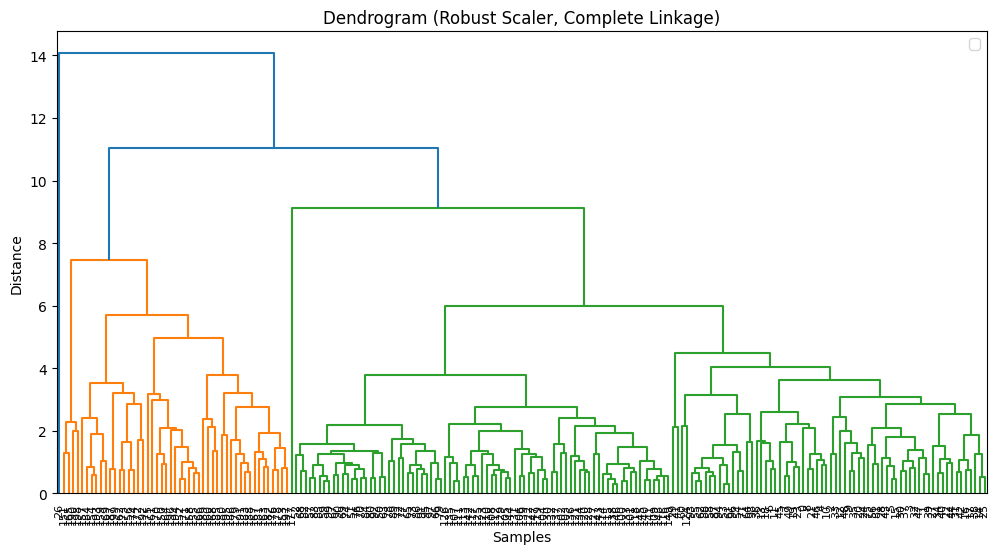

In [67]:
# compute linkage matrix for dendrogram
linkage_matrix = sch.linkage(behavior_scaled_robust, method=best_params['linkage'])

# plot dendrogram with cut line
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title(f"Dendrogram (Robust Scaler, {best_params['linkage'].capitalize()} Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.legend()
plt.show()


The dendrogram shows two clear clusters:

 - In the dendrogram, the “branches” (lines splitting the data) show how groups combine.

 - The biggest jump in branch height happens when the tree finally merges into two main groups (orange vs. green).

 - This jump means these two groups are much more different from each other than the smaller merges below them. → That’s why two clusters is the natural split.

It also shows the size of our respective clusters:

 - You can easily see that one branch (green) holds most of the samples, while the other (orange) is much smaller.

 - This matches the conclusion that we have a large mainstream segment and a smaller, distinct segment.

The dendrogram also shows good separation (high silhouette score reflected visually)

 - The fact that the two groups merge only at a very high vertical distance (around 14 on the chart) shows they are well-separated—it takes a lot of "distance" before they get combined into one.

In [68]:
# train the final HAC model with the best parameters found previously:

from sklearn.cluster import AgglomerativeClustering

final_model = AgglomerativeClustering(
    n_clusters=best_params['n_clusters'],
    linkage=best_params['linkage']
)
final_labels = final_model.fit_predict(behavior_scaled_robust)

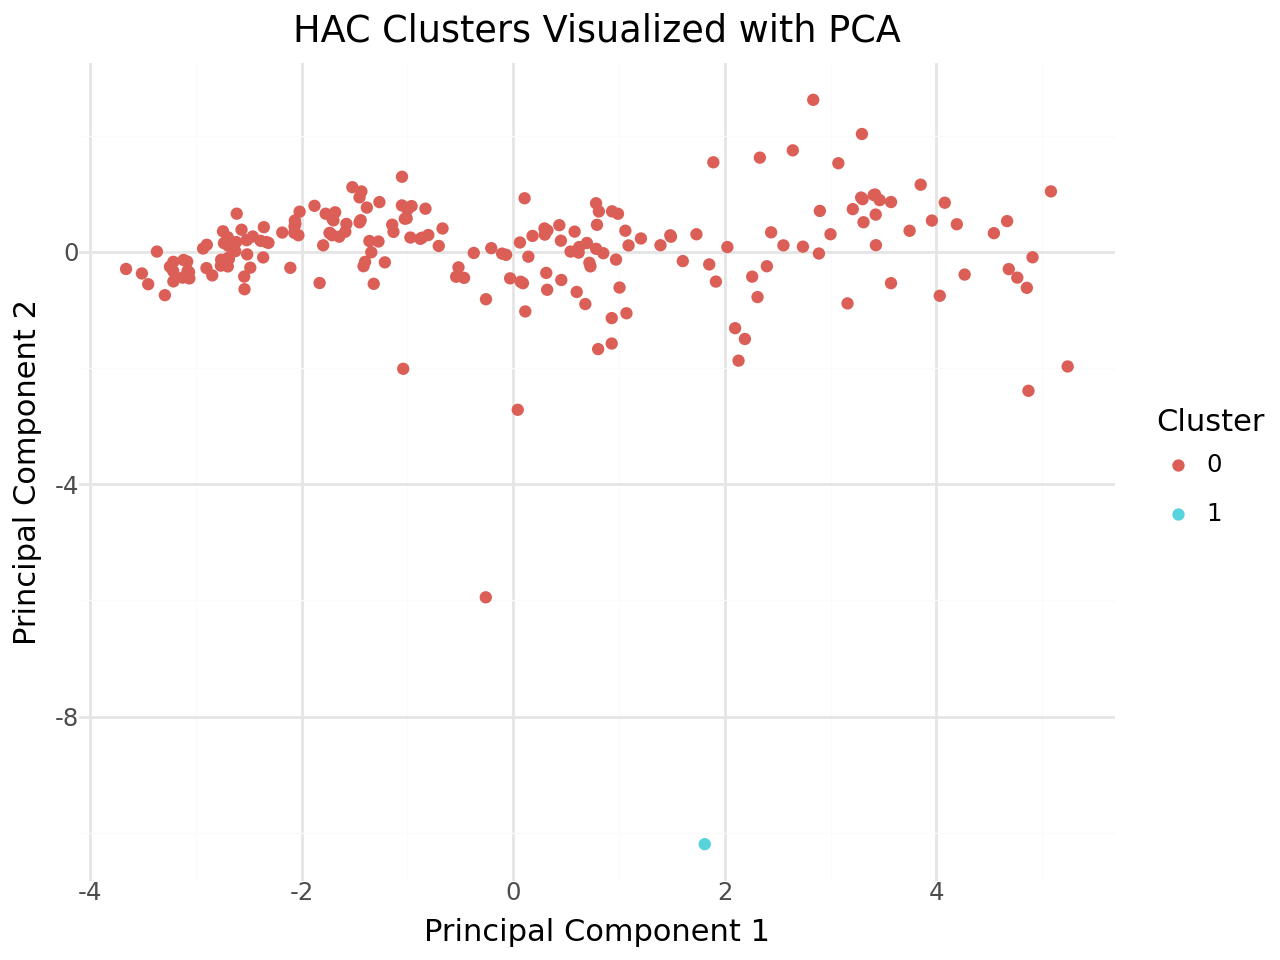

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(behavior_scaled_robust)

pca_df = pd.DataFrame(pca_result, columns = ['PC1', 'PC2'])
pca_df['clusters'] = final_labels

p = (
    ggplot(pca_df, aes(x='PC1', y='PC2', color='factor(clusters)')) +
    geom_point() +
    labs(title='HAC Clusters Visualized with PCA',
         x='Principal Component 1',
         y='Principal Component 2',
         color='Cluster') +
    theme_minimal()
)

p

> The PCA scatterplot shows good seperation of the clusters.

In [70]:
# add the final cluster labels to the original dataframe

behavior['cluster'] = final_labels

In [71]:
cluster_profiles = behavior.groupby('cluster').mean()
cluster_profiles

,age,current_income,length_of_subscription,monthly_visits,gender_nonbinary,gender_other,gender_woman,prop_ads_clicked_log,time_spent_browsing_log,longest_read_time_log,...,income_times_visits,income_times_time_spent,visits_times_time,visits_times_read,age_times_ads,age_times_time_spent,age_times_read,woman_times_ads,woman_times_visits,nonbinary_times_ads
cluster,,,,,,,,,,,,,,,,,,,,,
0,47.477387,62.70809,517.050647,27.548398,0.100503,0.025126,0.698492,0.112640,5.305360,5.535994,...,1976.048252,317.061281,135.316517,149.552764,6.235679,240.159630,259.342432,0.080703,19.838879,0.011758
1,52.000000,70.65000,280.203027,29.695198,0.000000,0.000000,1.000000,0.218008,3.079758,0.000000,...,2097.965762,217.584880,91.454015,0.000000,11.336431,160.147399,0.000000,0.218008,29.695198,0.000000


- The table above shows the average value of each feature for customers in cluster 0 vs cluster 1:

- Cluster 0 Characteristics:

 - Younger (47), lower income ($63k).
 - Long subscriptions (~517 days) and heavy browsing/reading.
 - Low ad-clicking behavior.
 - Business Insight/Cluster profile: Loyal readers with longer subscriptions, heaving browsing, but minimal ad engagement. This cluster drives long-term subscription revenue.
 - Strategy: Focus on retention via premium content, community building, and subscription perks, not ad revenue.

- Cluster 1 Characterstics:

 - Older (52), higher income ($71k).
 - Shorter subscriptions (~280 days), less engaged with browsing/reading
 - Higher ad-click rate.
 - Business Insight/Cluster profile: More ad-responsive users that tend to be older, short-term subscribers, with higher ad clicks. This cluster drives ad revenue but risks churn.
 - Strategy: Focus on retention offers, cross-promotion, or targeted ads.

# 2. Article Clustering Work:

In [72]:
# load the articles dataset as a pandas dataframe
articles = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_topics.csv")
articles.head()

,Stocks,Productivity,Fashion,Celebrity,Cryptocurrency,Science,Technology,SelfHelp,Fitness,AI,id
0,3,12,9,9,1,1,5,1,0,1,198
1,1,0,1,1,0,8,4,10,4,0,92
2,4,1,11,1,6,11,0,9,0,0,75
3,2,6,8,1,15,1,1,9,8,0,147
4,1,2,4,4,6,6,2,1,3,4,136


In [73]:
articles.columns

Index(['Stocks', 'Productivity', 'Fashion', 'Celebrity', 'Cryptocurrency',
       'Science', 'Technology', 'SelfHelp', 'Fitness', 'AI', 'id'],
      dtype='object')

In [74]:
articles.drop(columns = ["id"], inplace = True)

In [75]:
hac_article = AgglomerativeClustering(linkage = "average",
                                      metric = "cosine",
                                      distance_threshold = 0,
                                      n_clusters = None)

In [76]:
labels = hac_article.fit_predict(articles)

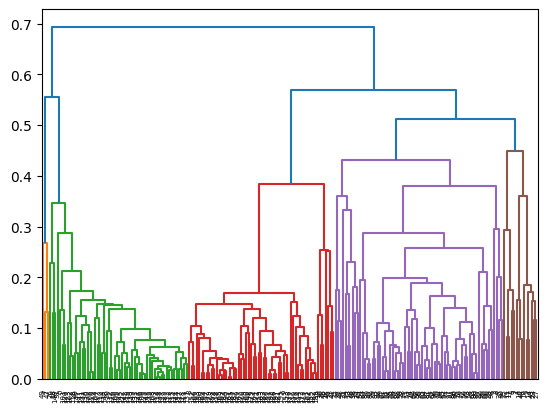

In [77]:
# dendrogram plot function from sklearn: https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
def plot_dendrogram(hac, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(hac.children_.shape[0])
    n_samples = len(hac.labels_)
    for i, merge in enumerate(hac.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [hac.children_, hac.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(hac_article, color_threshold= 0.5)

> From the dendrogram above, we can see that the hac model segments 5 clear clusters indicated by the colors.

In [78]:
hac = AgglomerativeClustering(linkage = "average",
                              metric = "cosine",
                              n_clusters = 5)
labels = hac.fit_predict(articles)

In [84]:
articles["cluster"] = labels
gg_list = []
for test in articles.columns.tolist():
    title = "Test " + test.capitalize() + " Cluster Performance"
    gg_list.append(ggplot(articles, aes(x = "factor(cluster)", y = test))
          + geom_boxplot(aes(fill = "factor(cluster)")) +
          theme_minimal() +
          scale_fill_discrete(name = "Cluster Assignment") +
          labs(x = "Cluster",
               y = "Score",
               title = title))

- Median and spread: The horizontal line inside the box shows the median number of articles for that topic in the cluster.

- Cluster differences: Taller boxes or higher medians indicate that a particular cluster reads more articles in that topic.

- Outliers: Points outside the whiskers indicate unusually high or low article counts within the cluster.

- Cluster profile: By looking at all the boxplots, you can identify which clusters focus on which topics. For example, a cluster with high medians in "Technology" and "AI" is tech-focused, while high "Celebrity" and "Fashion" indicates lifestyle/entertainment interests.

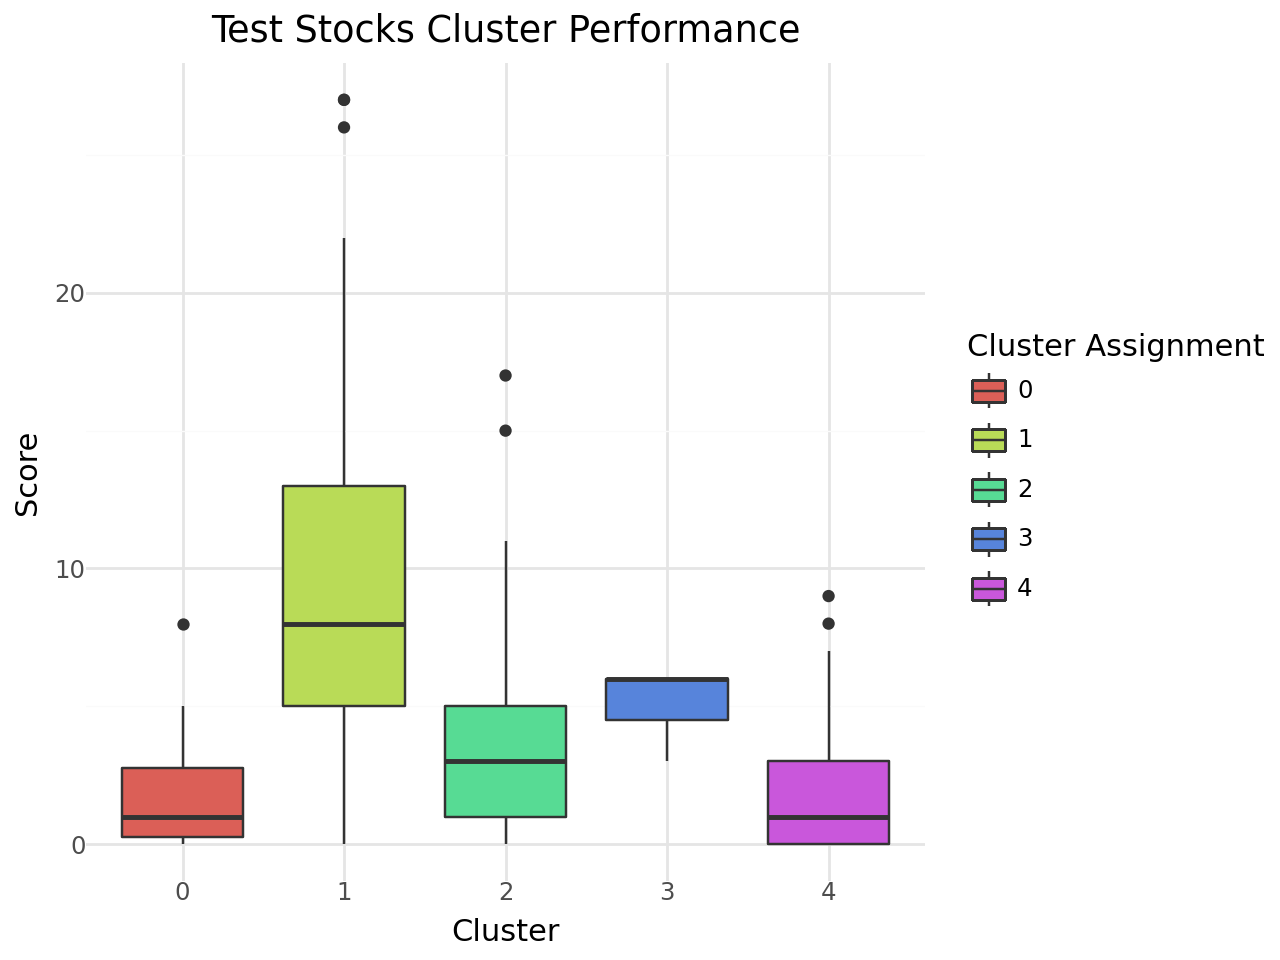

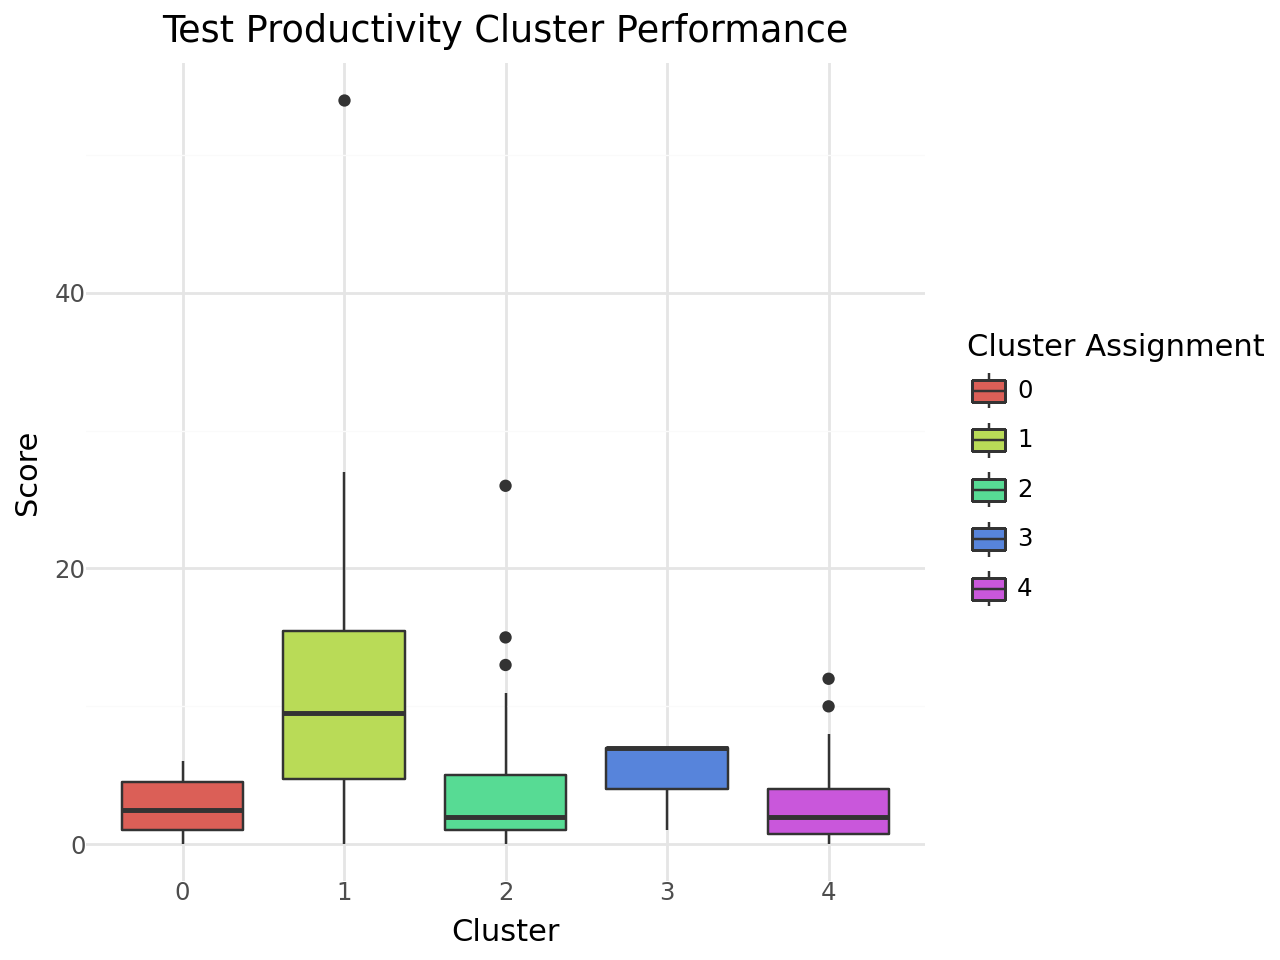

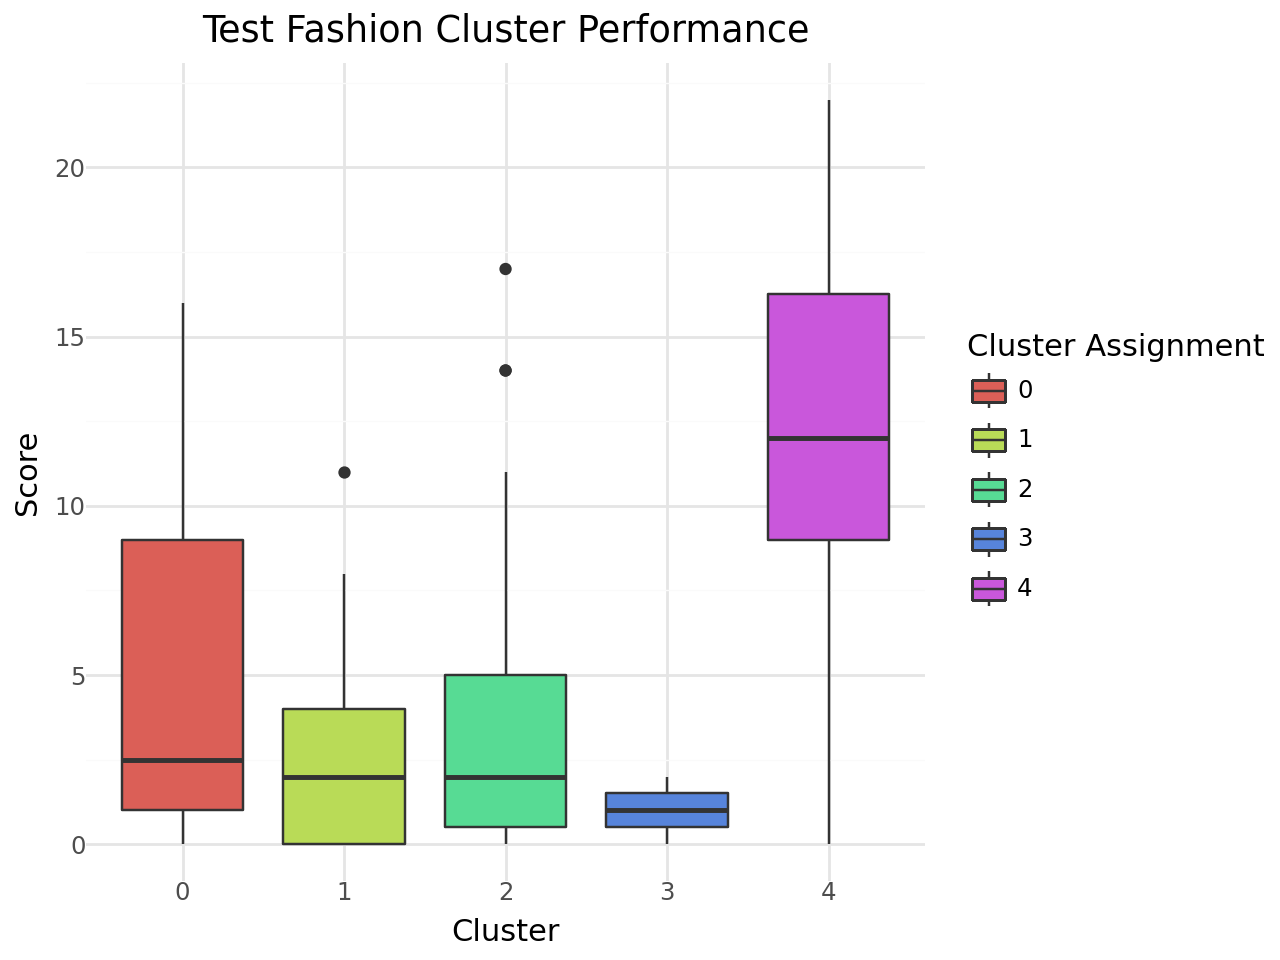

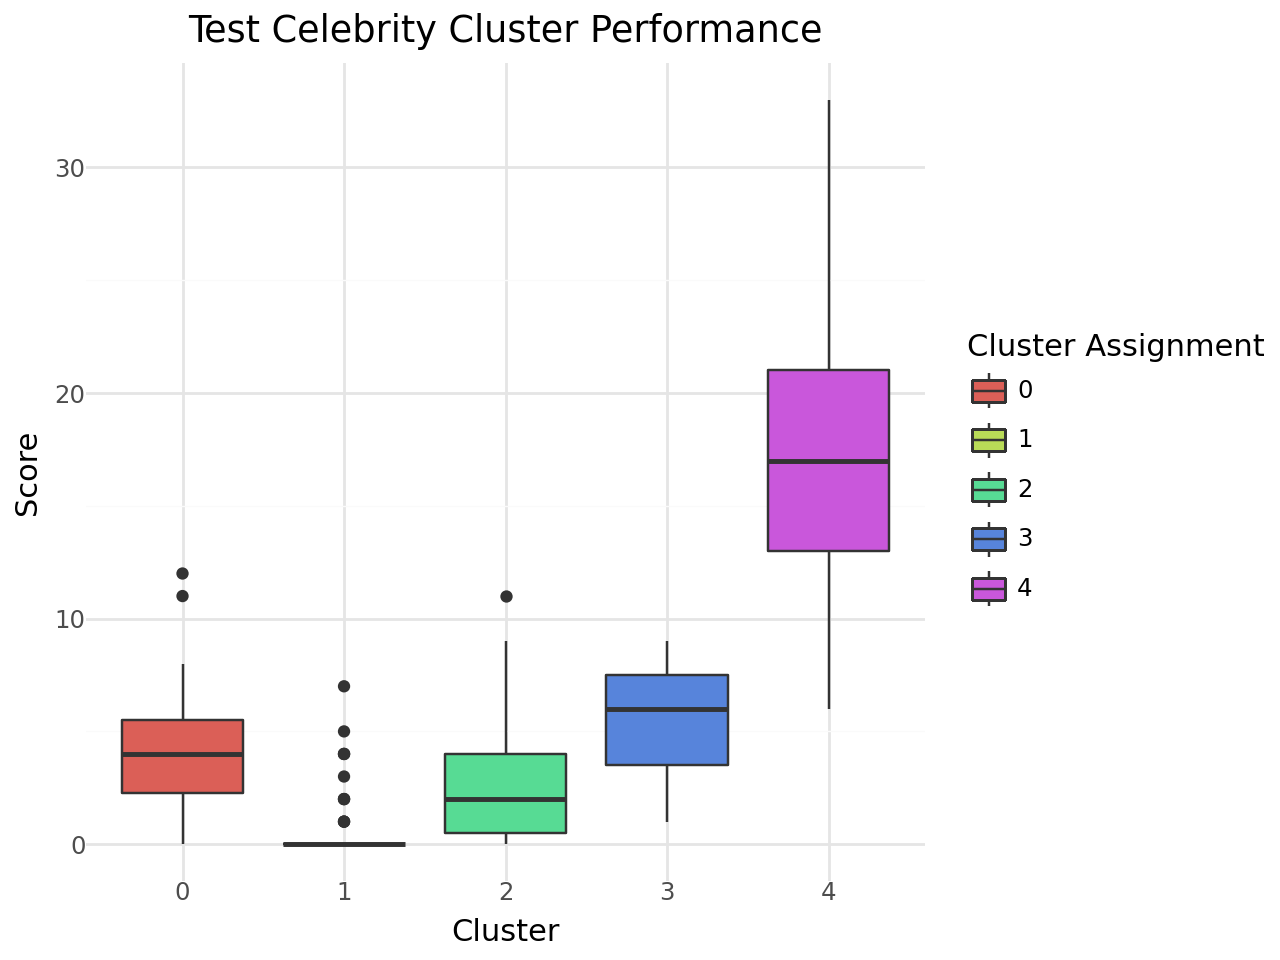

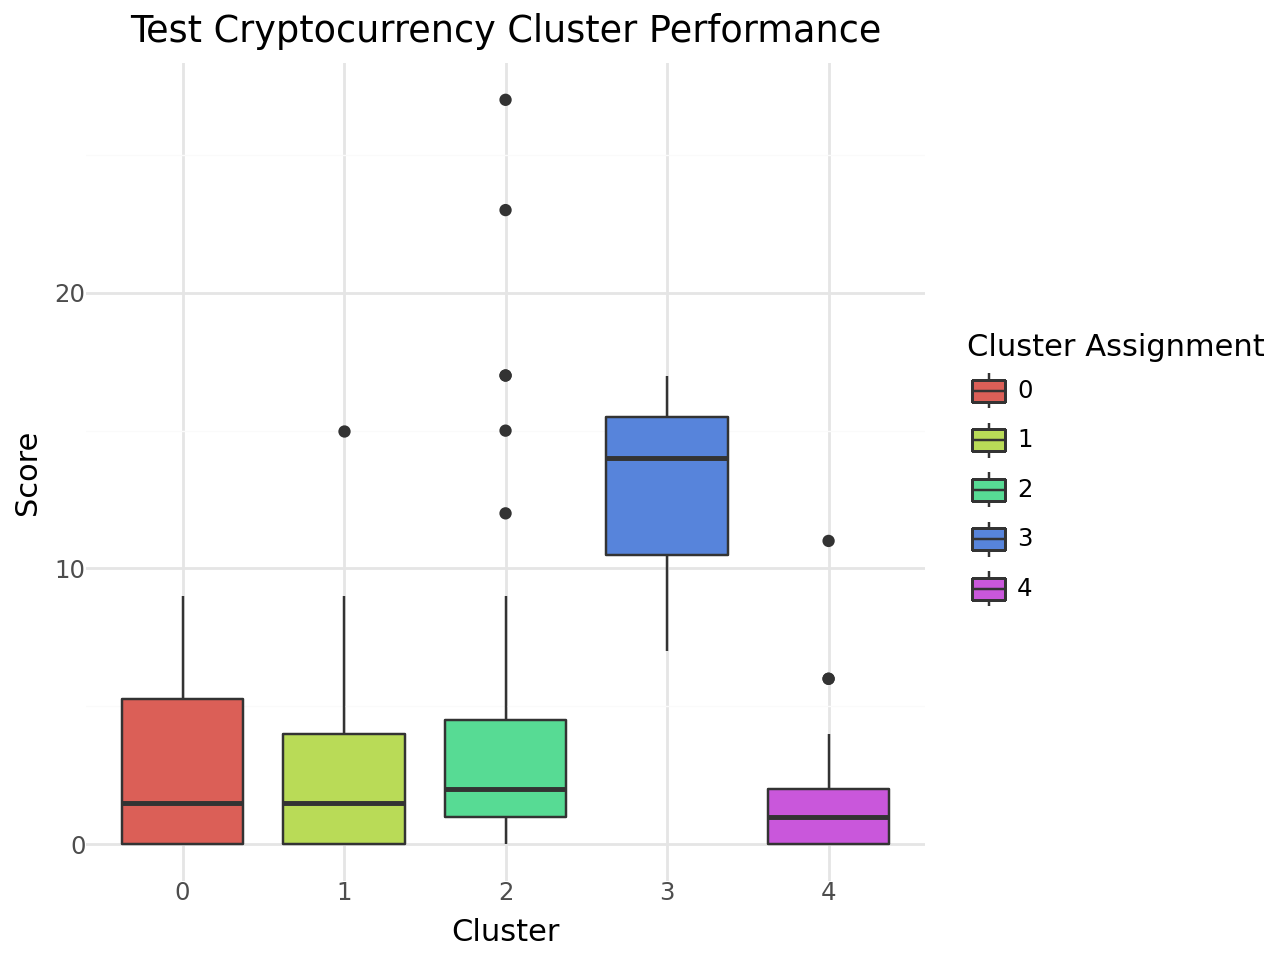

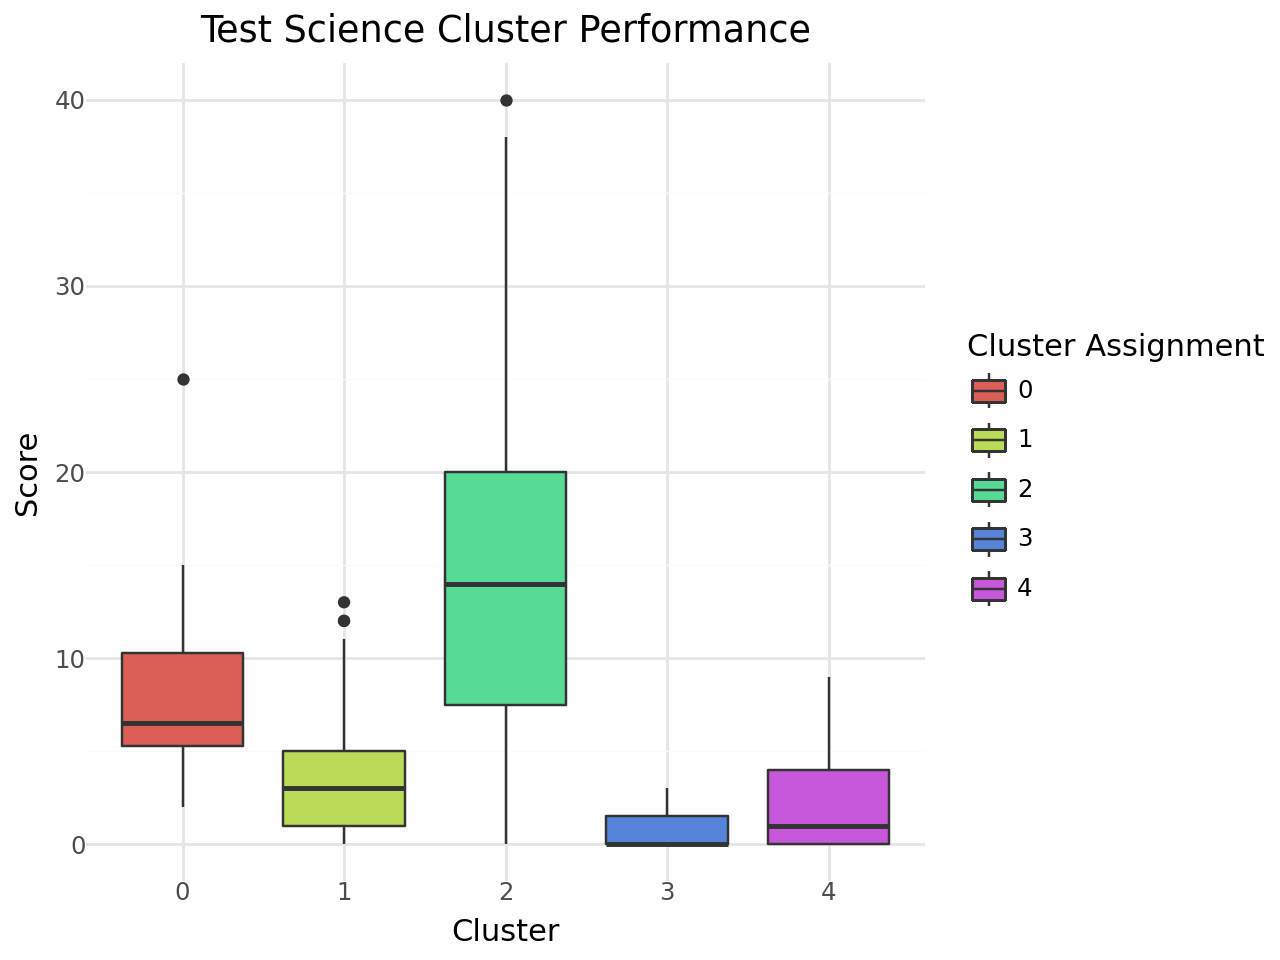

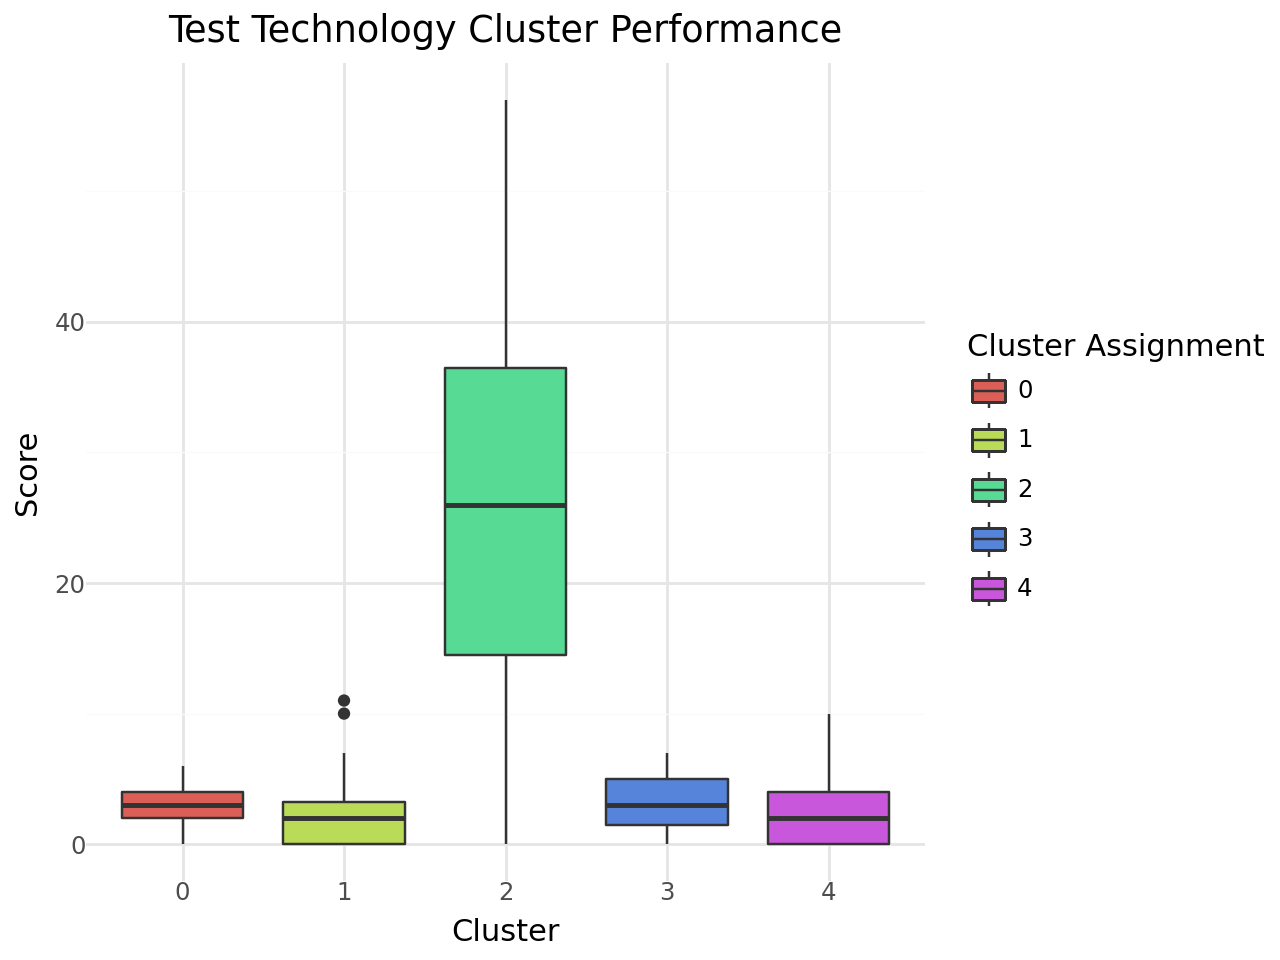

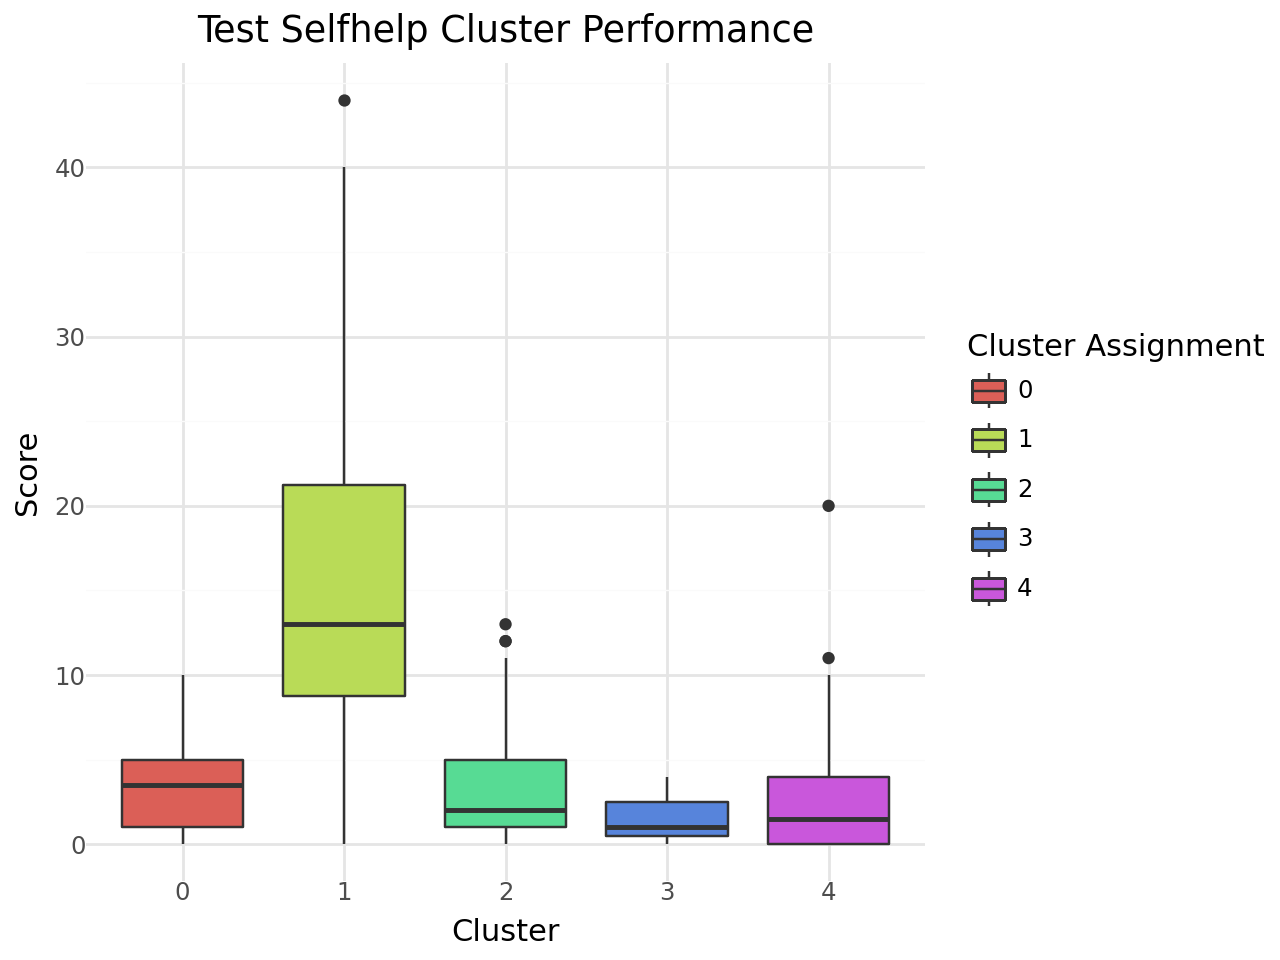

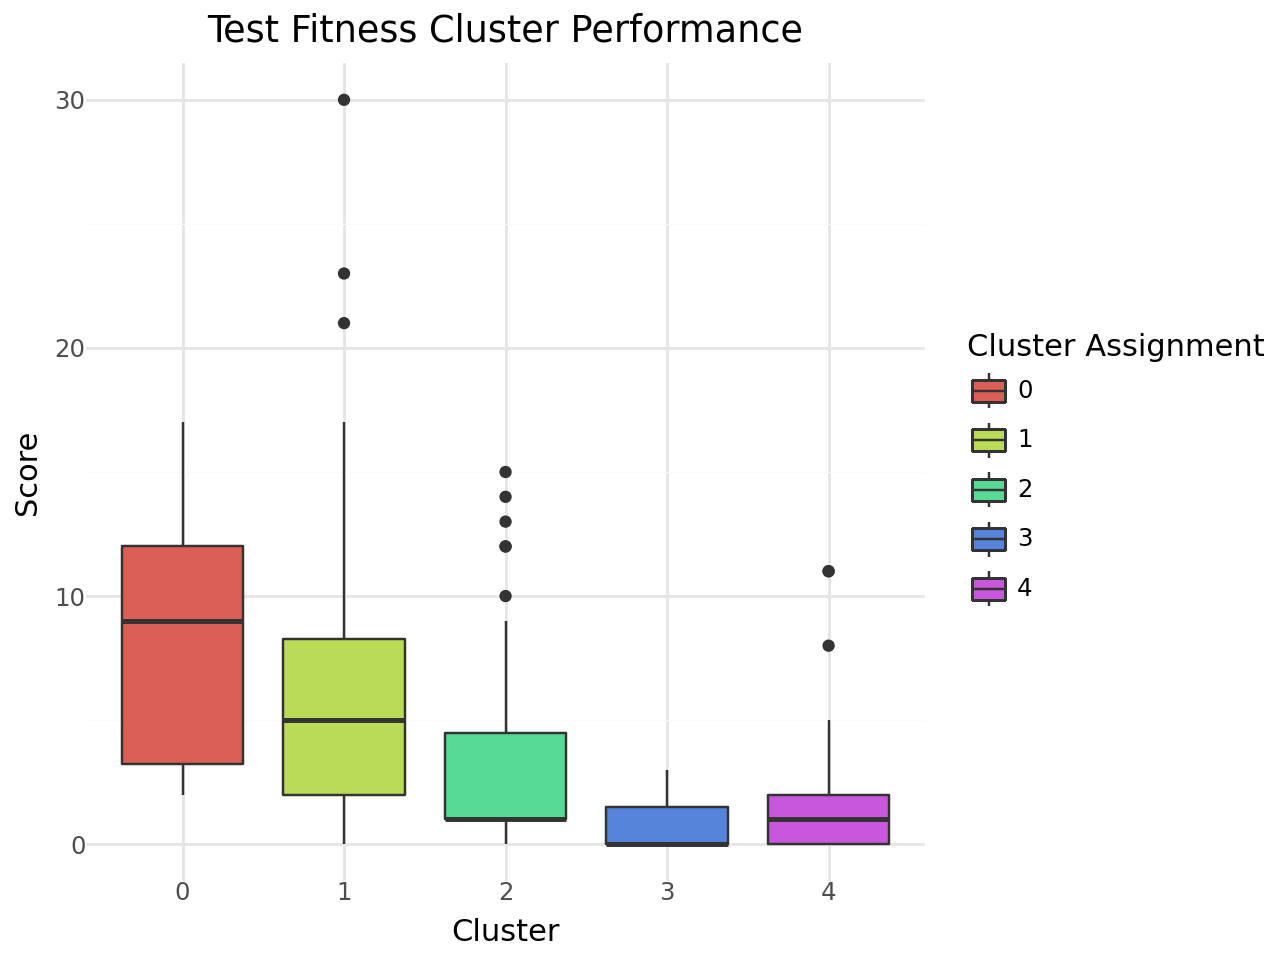

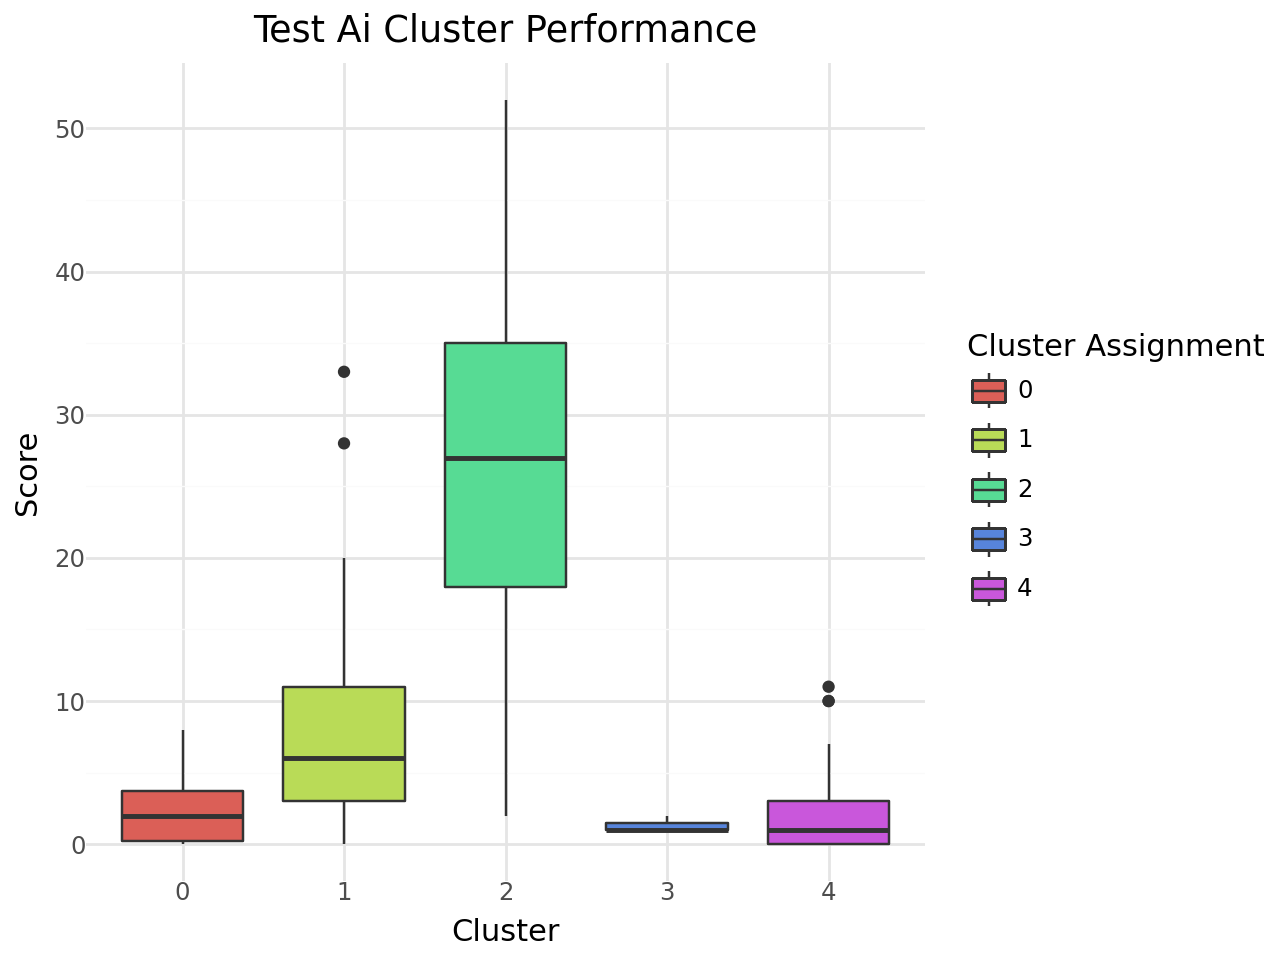

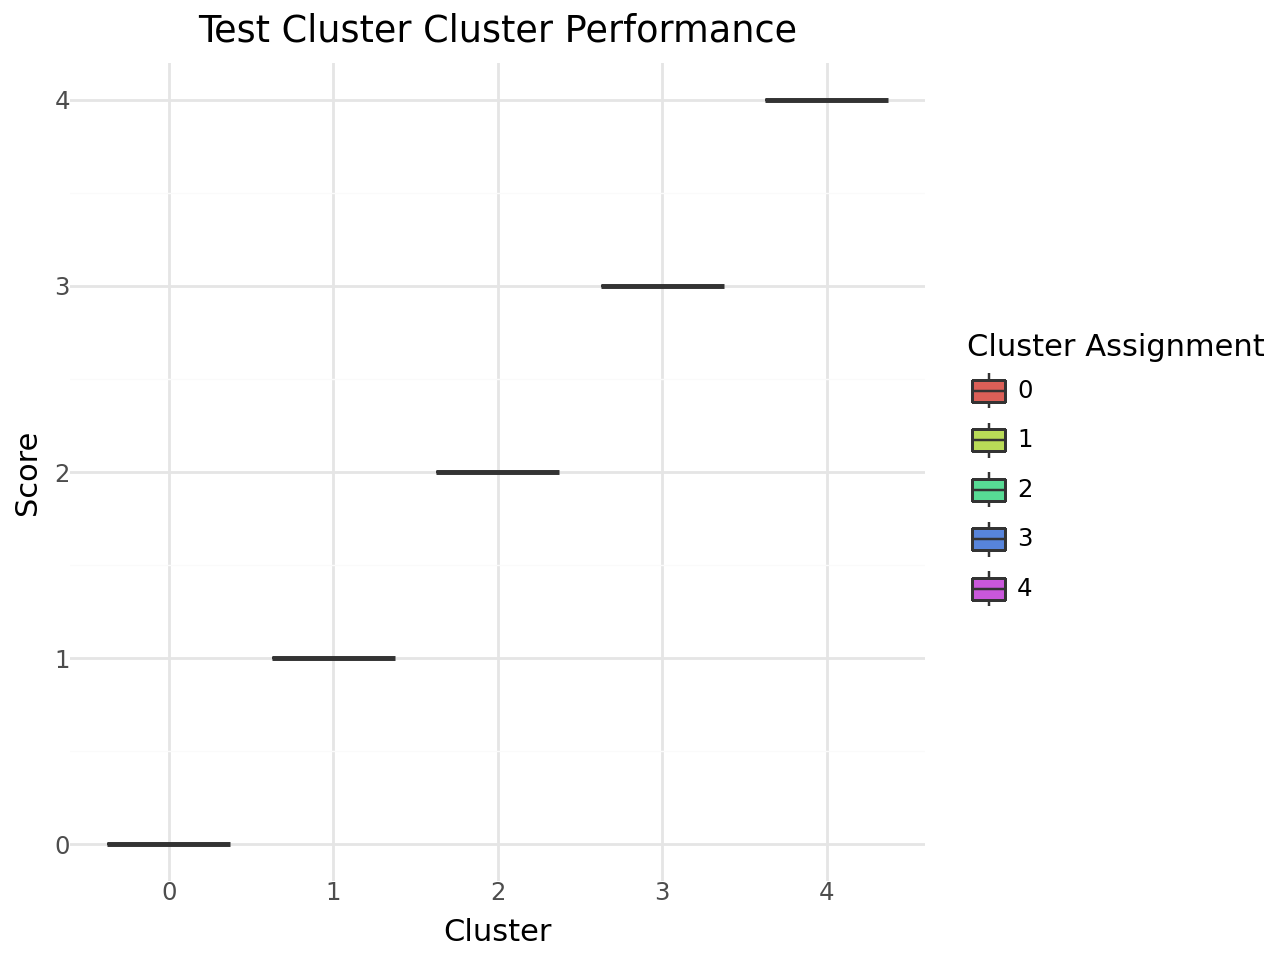

In [85]:
for plot in gg_list:
  display(plot)

In [86]:
summary_table = articles.groupby('cluster').mean()

In [87]:
summary_table

,Stocks,Productivity,Fashion,Celebrity,Cryptocurrency,Science,Technology,SelfHelp,Fitness,AI
cluster,,,,,,,,,,
0,2.000000,2.642857,5.214286,4.571429,2.714286,8.142857,2.857143,3.642857,8.142857,2.642857
1,9.544118,11.191176,2.308824,0.529412,2.500000,3.867647,2.279412,15.044118,6.426471,7.794118
2,3.508475,3.779661,3.220339,2.745763,4.033898,14.271186,26.169492,3.355932,3.355932,26.101695
3,5.000000,5.000000,1.000000,5.333333,12.666667,1.000000,3.333333,1.666667,1.000000,1.333333
4,1.910714,2.767857,12.607143,17.250000,1.517857,2.000000,2.517857,2.892857,1.607143,1.928571


- The table shows which topics are most prevalent in each cluster, giving insight into the thematic focus of each group of articles. Here's a cluster-by-cluster interpretation:

### **Cluster 0**

* **High counts:** Science (8.14), Fitness (8.14), Celebrity (4.57), Fashion (5.21)
* **Moderate counts:** SelfHelp (3.64), Cryptocurrency (2.71), Stocks (2.0), Productivity (2.64)
* **Low counts:** AI (2.64), Technology (2.86)
* **Interpretation:** This cluster seems focused on **Science and Fitness**, with notable coverage of **Fashion and Celebrity topics**. It’s a mixed-interest cluster combining lifestyle and scientific content.

---

### **Cluster 1**

* **High counts:** SelfHelp (15.04), Productivity (11.19), Stocks (9.54), Fitness (6.43), AI (7.79)
* **Low counts:** Celebrity (0.53), Fashion (2.31), Technology (2.28), Science (3.87), Cryptocurrency (2.5)
* **Interpretation:** This cluster is **career and self-improvement oriented**, emphasizing **SelfHelp, Productivity, and Stocks**, with additional interest in **AI and Fitness**. Entertainment topics like Celebrity and Fashion are minimal.

---

### **Cluster 2**

* **High counts:** Technology (26.17), AI (26.10), Science (14.27)
* **Moderate counts:** Cryptocurrency (4.03), Stocks (3.51), Productivity (3.78)
* **Low counts:** Fashion (3.22), Celebrity (2.75), SelfHelp (3.36), Fitness (3.36)
* **Interpretation:** This cluster is clearly **tech and science focused**, with strong emphasis on **Technology and AI**, followed by **Science**. Other lifestyle topics are secondary.

---

### **Cluster 3**

* **High counts:** Cryptocurrency (12.67), Celebrity (5.33), Stocks (5.0), Productivity (5.0)
* **Moderate counts:** Technology (3.33), SelfHelp (1.66)
* **Low counts:** Fashion (1.0), Science (1.0), Fitness (1.0), AI (1.33)
* **Interpretation:** This cluster seems **finance and pop culture oriented**, combining **Cryptocurrency, Stocks, and Celebrity** content, with little emphasis on Science or Technology.

---

### **Cluster 4**

* **High counts:** Celebrity (17.25), Fashion (12.61)
* **Moderate counts:** SelfHelp (2.89), Productivity (2.77), Technology (2.52)
* **Low counts:** Stocks (1.91), Fitness (1.61), Science (2.0), AI (1.93), Cryptocurrency (1.52)
* **Interpretation:** This cluster is primarily **lifestyle and entertainment focused**, emphasizing **Celebrity and Fashion**, with minimal coverage of technical or finance topics.

---

**Overall Takeaways:**

* Cluster 2 = **Tech & Science**
* Cluster 1 = **SelfHelp / Productivity & Finance**
* Cluster 0 = **Science & Fitness with Lifestyle**
* Cluster 3 = **Finance & Pop Culture**
* Cluster 4 = **Celebrity & Fashion**